In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, ShuffleSplit, StratifiedKFold
from mlxtend.classifier import OneRClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest,  SelectPercentile, f_classif, GenericUnivariateSelect, mutual_info_classif, SelectFromModel, VarianceThreshold, chi2
from sklearn.inspection import permutation_importance
from sklearn.manifold import TSNE
import statsmodels.api as sm
from sklearn.feature_selection import RFECV
from catboost import CatBoostClassifier

In [4]:
df = pd.read_csv('riceClassification.csv', sep=';')

In [5]:
df

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [7]:
df.isnull().sum()

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

In [8]:
df.Class.value_counts()

Class
1    9985
0    8200
Name: count, dtype: int64

In [9]:
df.describe()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


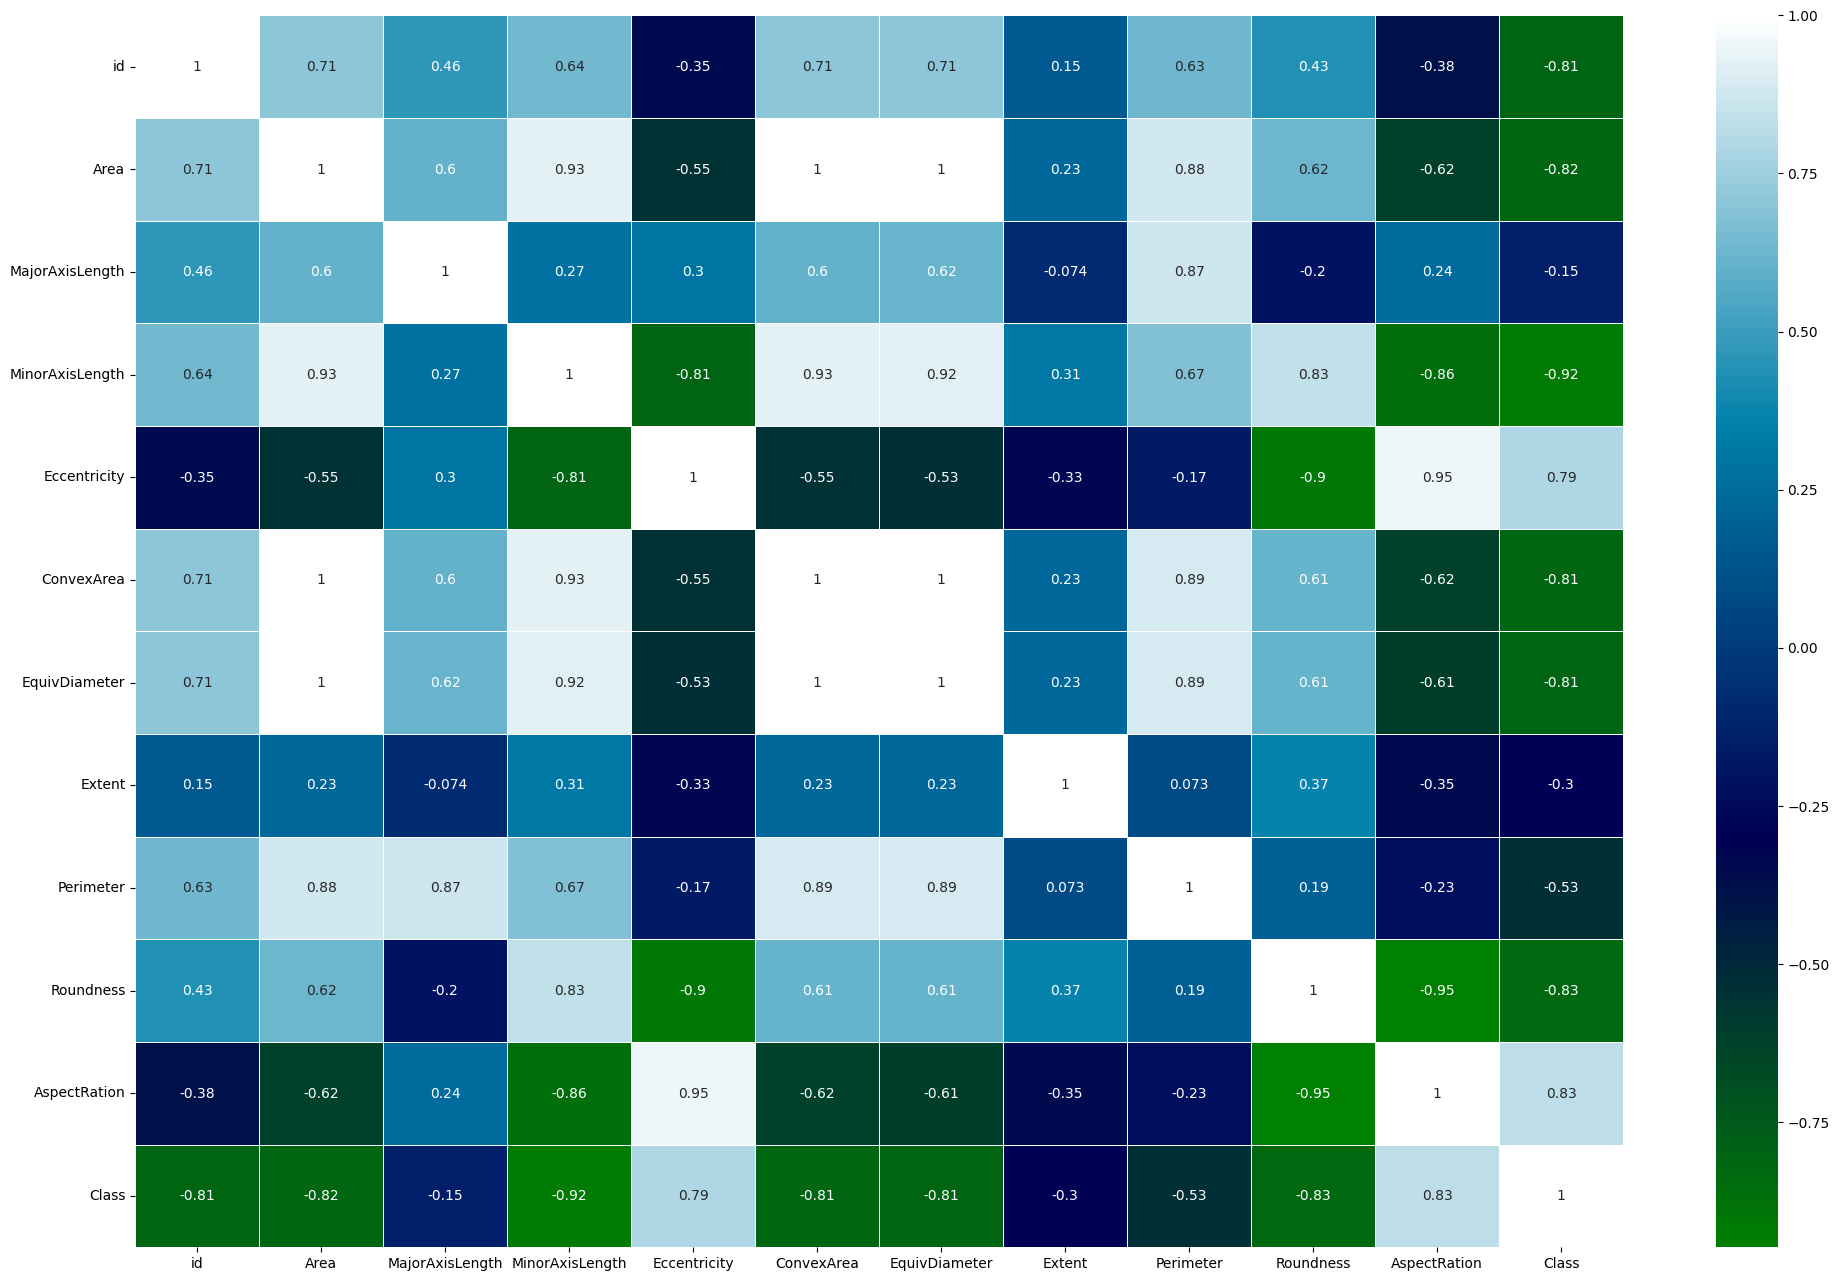

In [10]:
plt.figure(figsize=(24,16))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, cmap='ocean')
plt.show()

In [11]:
df = df.drop('id', axis=1)

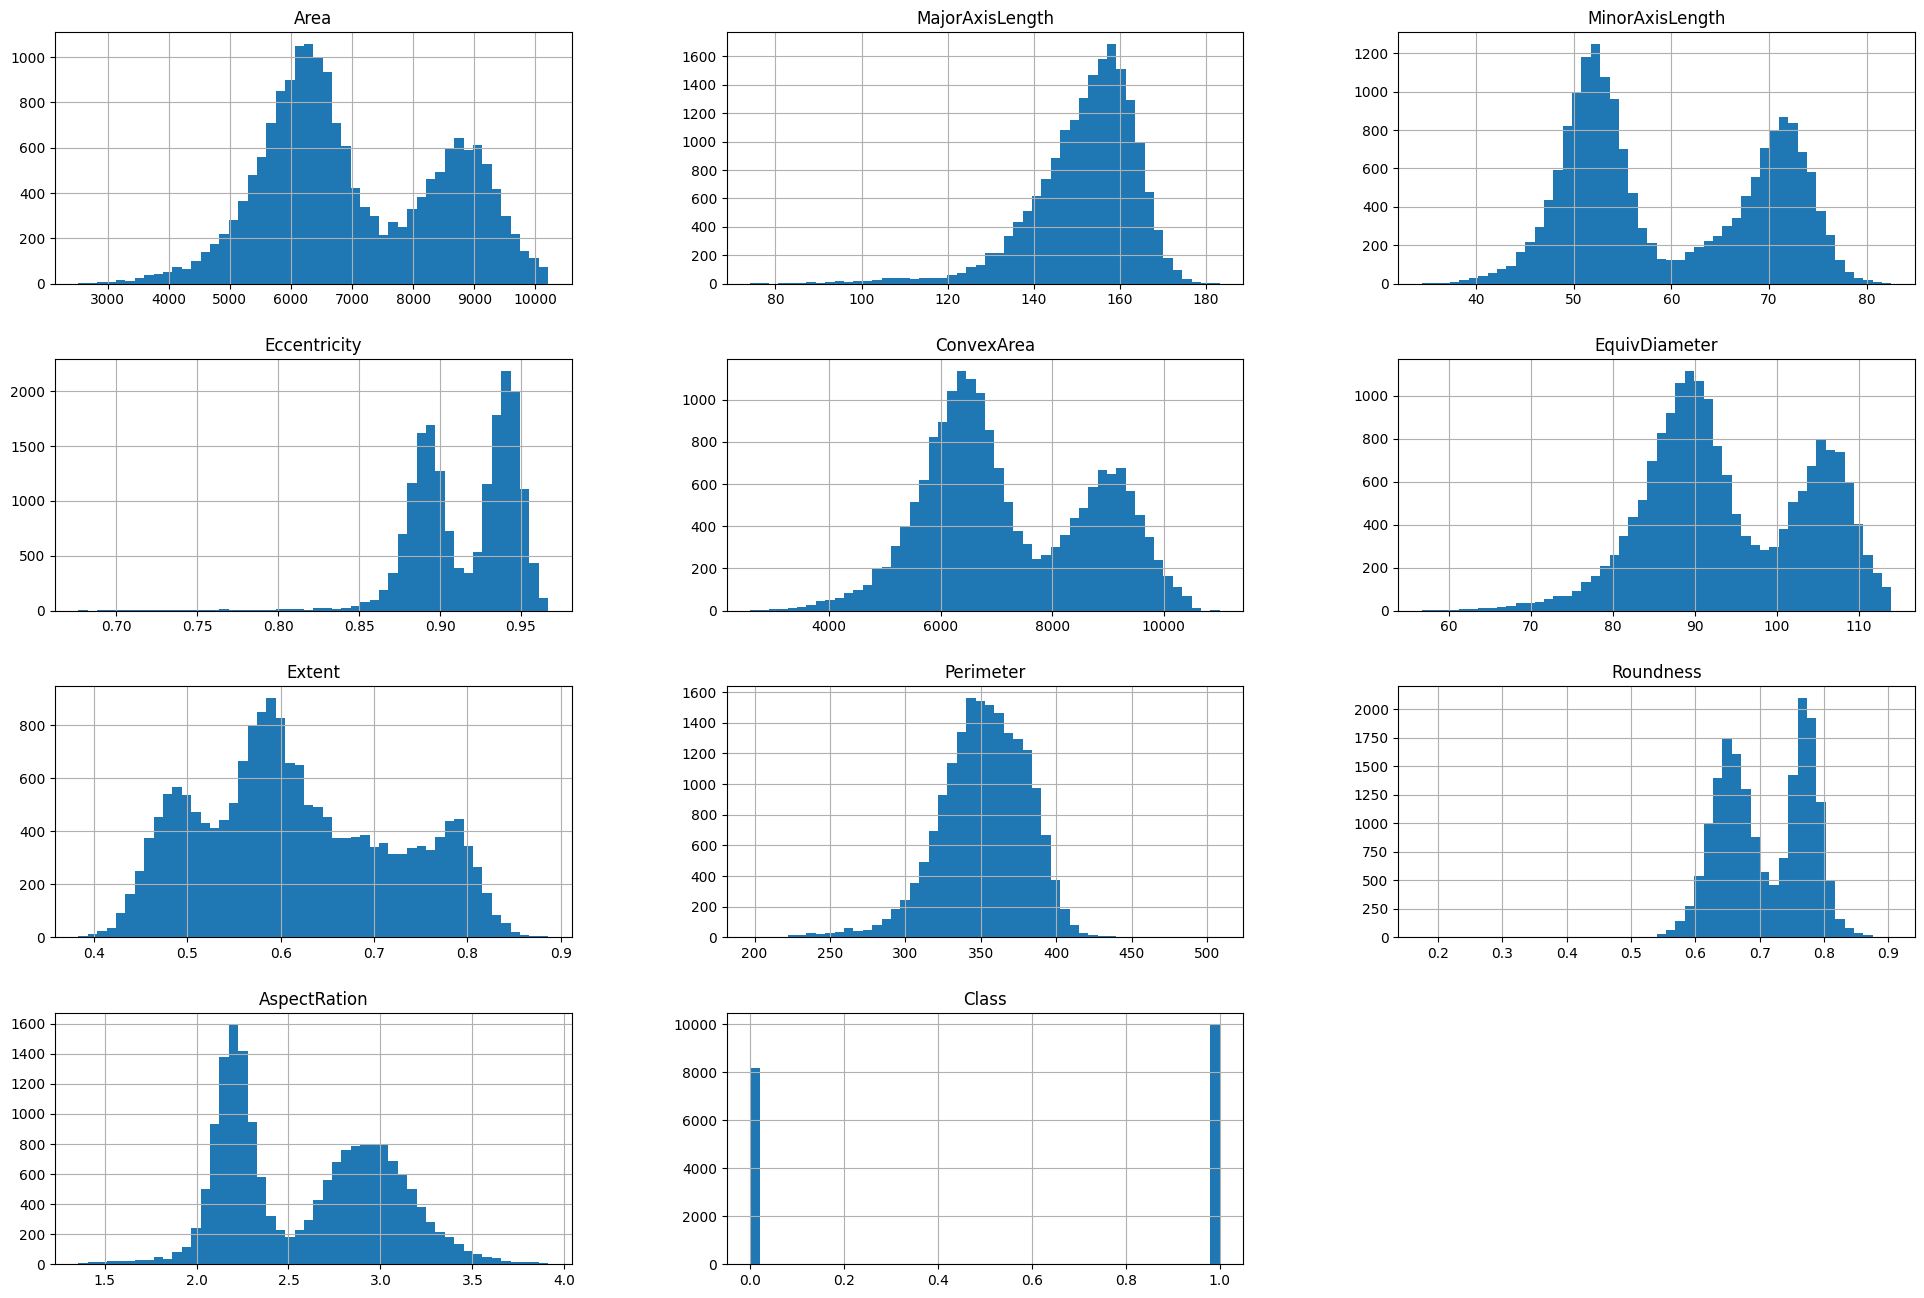

In [12]:
df.hist(bins=50, figsize=(24,16))
plt.show()

In [13]:
from scipy.stats import shapiro

for column in df.columns:
    stat, p = shapiro(df[column])
    print(f'Столбец {column}: Статистика={stat:.3f}, p={p:.3f}')
    # Интерпретация результата
    alpha = 0.05
    if p > alpha:
        print('Выборка похожа на нормальное распределение (не отклоняем H0)')
    else:
        print('Выборка не похожа на нормальное распределение (отклоняем H0)')

Столбец Area: Статистика=0.961, p=0.000
Выборка не похожа на нормальное распределение (отклоняем H0)
Столбец MajorAxisLength: Статистика=0.915, p=0.000
Выборка не похожа на нормальное распределение (отклоняем H0)
Столбец MinorAxisLength: Статистика=0.910, p=0.000
Выборка не похожа на нормальное распределение (отклоняем H0)
Столбец Eccentricity: Статистика=0.898, p=0.000
Выборка не похожа на нормальное распределение (отклоняем H0)
Столбец ConvexArea: Статистика=0.961, p=0.000
Выборка не похожа на нормальное распределение (отклоняем H0)
Столбец EquivDiameter: Статистика=0.967, p=0.000
Выборка не похожа на нормальное распределение (отклоняем H0)
Столбец Extent: Статистика=0.970, p=0.000
Выборка не похожа на нормальное распределение (отклоняем H0)
Столбец Perimeter: Статистика=0.976, p=0.000
Выборка не похожа на нормальное распределение (отклоняем H0)
Столбец Roundness: Статистика=0.948, p=0.000
Выборка не похожа на нормальное распределение (отклоняем H0)
Столбец AspectRation: Статистика=0

C:\Users\Dron\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


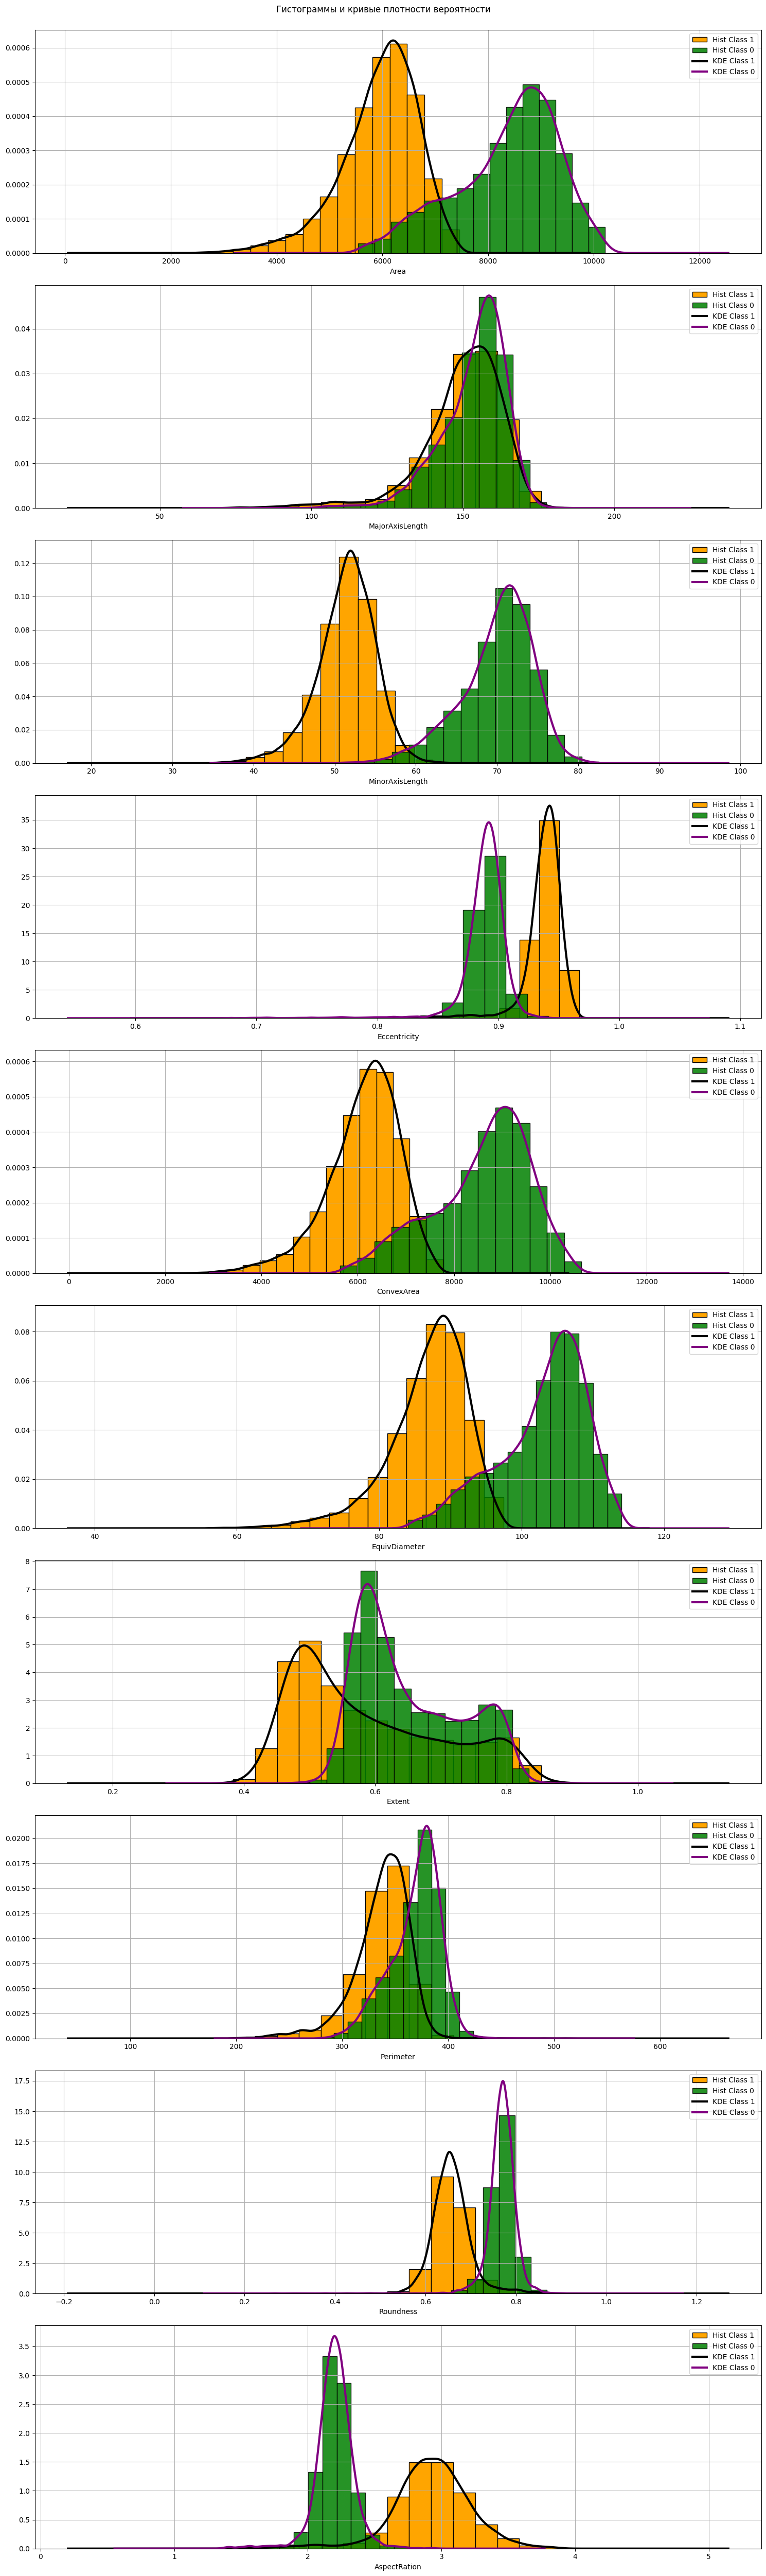

In [17]:
def draw_pdf(data: pd.DataFrame, bins = 15):

    fig, axes = plt.subplots(len(data.columns[:-1]), 1, figsize=(15, 50))
    
    for i, column in enumerate(data.columns[:-1]):

        ax = axes[i]
        # ax.hist(data[column], density=True, bins=bins, color='orange', edgecolor='black', label='Density')
        ax.hist(data[data["Class"]==1][column], density=True, bins=bins, color='orange', edgecolor='black', label='Hist Class 1')
        ax.hist(data[data["Class"]==0][column], density=True, bins=bins, color='green', alpha=0.85, edgecolor='black', label='Hist Class 0')
        data[data["Class"]==1][column].plot.kde(ax=ax, color='black', linewidth=3, label='KDE Class 1')
        data[data["Class"]==0][column].plot.kde(ax=ax, color='purple', linewidth=3, label='KDE Class 0')
        # data[column].plot.kde(ax=ax, color='black', linewidth=3, label='KDE')
        ax.set_xlabel(f'{column}')
        ax.set_ylabel(None)
        # ax.set_xlim(data[column].min() - (data[column].max() - data[column].min()) * 0.1, data[column].max() + (data[column].max() - data[column].min()) * 0.1)
        ax.grid(True)
        ax.legend()


    fig.suptitle('Гистограммы и кривые плотности вероятности', y=1)
    fig.tight_layout()
    plt.show()

draw_pdf(df)

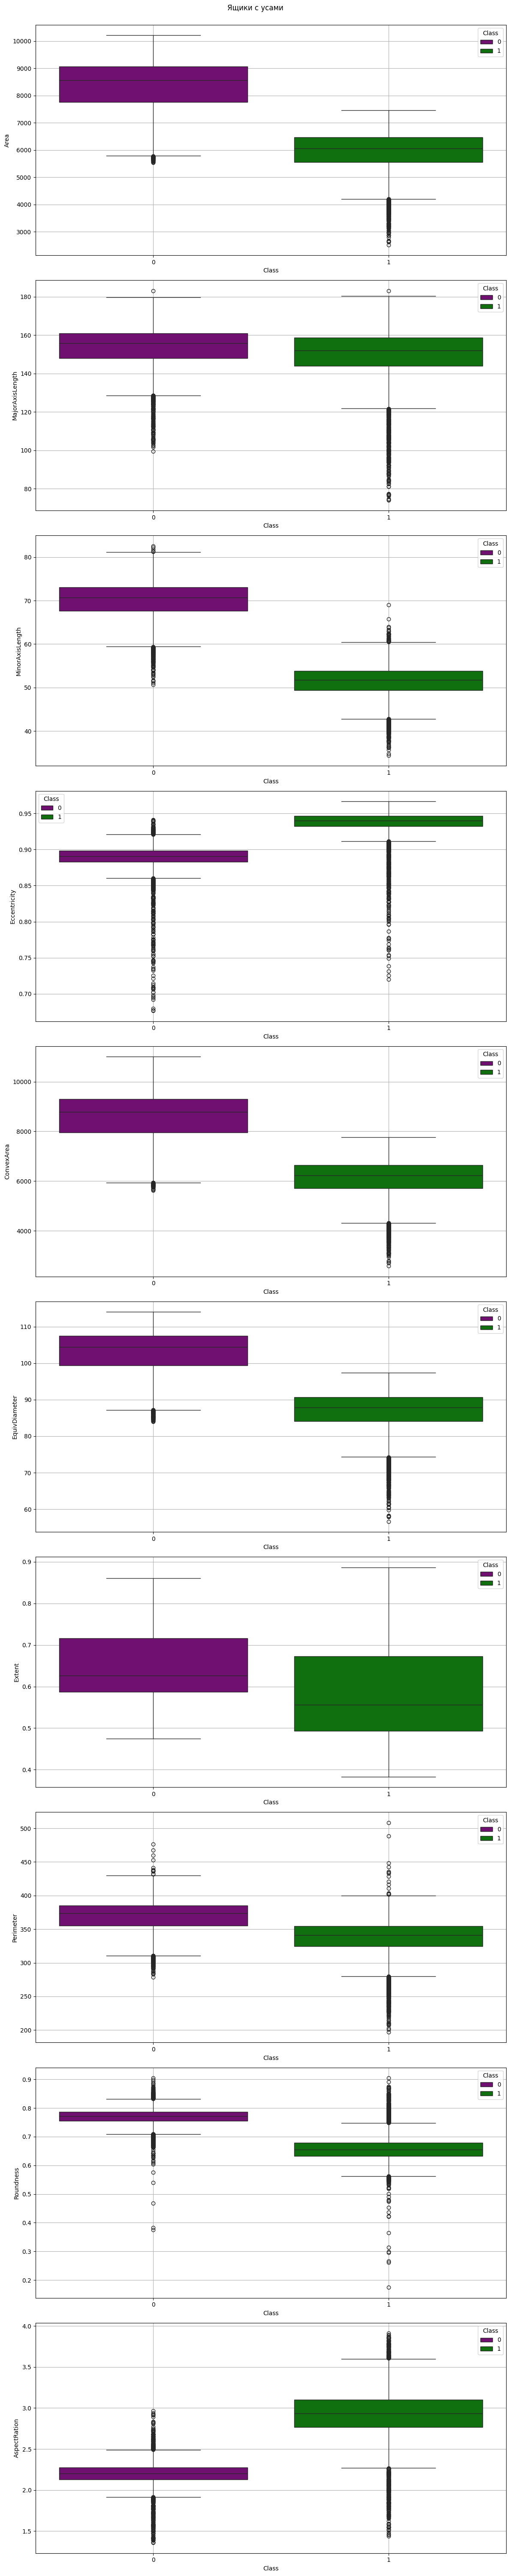

In [15]:
def draw_boxplots(data: pd.DataFrame):

    fig, axes = plt.subplots(len(data.columns[:-1]), 1, figsize=(12, 60))

    for i, column in enumerate(data.columns[:-1]):

        ax = axes[i]
        # ax.title(column, fontsize=15, fontweight='bold', ha='center')
        sns.boxplot(x = data['Class'], y = data.loc[:, data.columns != 'Class'][column], data = data, hue='Class', palette=['purple', 'green'], ax=ax)
        ax.set_xlabel('Class')
        ax.set_ylabel(column)
        ax.grid(True)

    fig.suptitle('Ящики с усами', y=1)
    fig.tight_layout()
    plt.show()

draw_boxplots(df)

In [16]:
df.shape

(18185, 11)

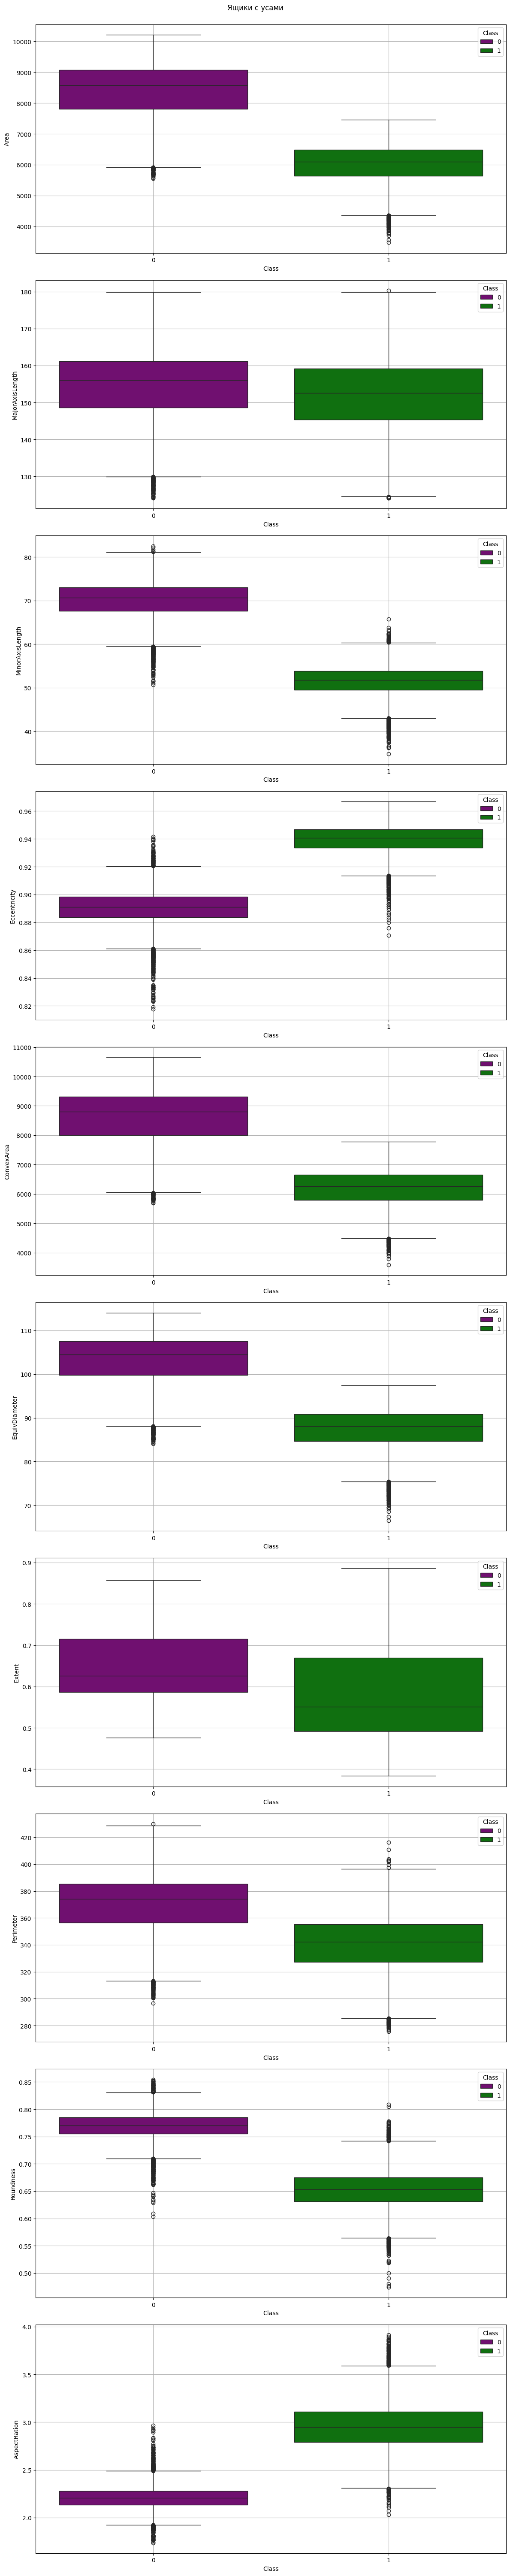

In [17]:
import scipy.stats as stats

Q1 = df.quantile(q=0.25)
Q3 = df.quantile(q=0.75)
IQR = df.apply(stats.iqr)

df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

draw_boxplots(df_clean)

In [18]:
df_clean.shape

(17607, 11)

In [19]:
# z = np.abs(stats.zscore(df))

# data_clean = df[(z<3).all(axis=1)]

# data_clean.shape

In [20]:
df_clean.head(5)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
158,6374,129.576759,63.762307,0.870549,6476,90.086785,0.662234,314.656,0.809003,2.032184,1
186,6946,136.303603,65.738475,0.876009,7115,94.042128,0.594437,338.782,0.760508,2.073422,1
207,5786,125.555431,59.626250,0.880040,5945,85.831020,0.623491,307.304,0.769931,2.105707,1
218,5896,127.013995,59.843292,0.882050,6092,86.643063,0.610352,309.264,0.774655,2.122443,1
227,6082,129.098407,60.416315,0.883736,6204,87.999107,0.661375,308.106,0.805111,2.136814,1


In [21]:
X = df_clean.drop('Class', axis=1)

In [22]:
X

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
158,6374,129.576759,63.762307,0.870549,6476,90.086785,0.662234,314.656,0.809003,2.032184
186,6946,136.303603,65.738475,0.876009,7115,94.042128,0.594437,338.782,0.760508,2.073422
207,5786,125.555431,59.626250,0.880040,5945,85.831020,0.623491,307.304,0.769931,2.105707
218,5896,127.013995,59.843292,0.882050,6092,86.643063,0.610352,309.264,0.774655,2.122443
227,6082,129.098407,60.416315,0.883736,6204,87.999107,0.661375,308.106,0.805111,2.136814
...,...,...,...,...,...,...,...,...,...,...
18180,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535
18181,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910
18182,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396
18183,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216


In [23]:
y = df_clean['Class']
y

158      1
186      1
207      1
218      1
227      1
        ..
18180    0
18181    0
18182    0
18183    0
18184    0
Name: Class, Length: 17607, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [25]:
standartscaler = StandardScaler()
x_train = standartscaler.fit_transform(X_train)
x_test = standartscaler.transform(X_test)

In [26]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([6018, 7187], dtype=int64))

## LogisticRegression

In [30]:
# log_model = LogisticRegression()
# log_model.fit(X_train, y_train)
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

LogisticRegression()

In [31]:
log_score = log_model.score(x_test, y_test)
log_score

0.9913675601999091

In [32]:
log_score_train = log_model.score(x_train, y_train)
log_score_train


0.9896251419916698

In [33]:
y_pred_log = log_model.predict(x_test)

In [34]:
np.mean(y_test == y_pred_log)

0.9913675601999091

In [35]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2038
           1       0.99      1.00      0.99      2364

    accuracy                           0.99      4402
   macro avg       0.99      0.99      0.99      4402
weighted avg       0.99      0.99      0.99      4402



In [36]:
confusion_matrix(y_test, y_pred_log)

array([[2011,   27],
       [  11, 2353]], dtype=int64)

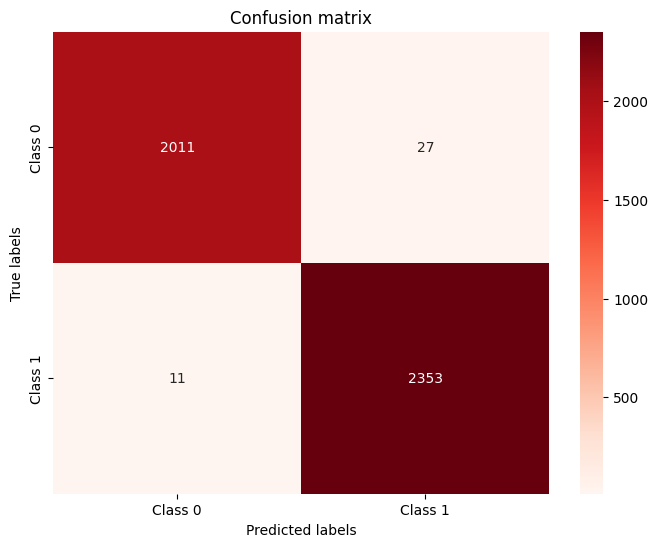

In [37]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Reds', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()

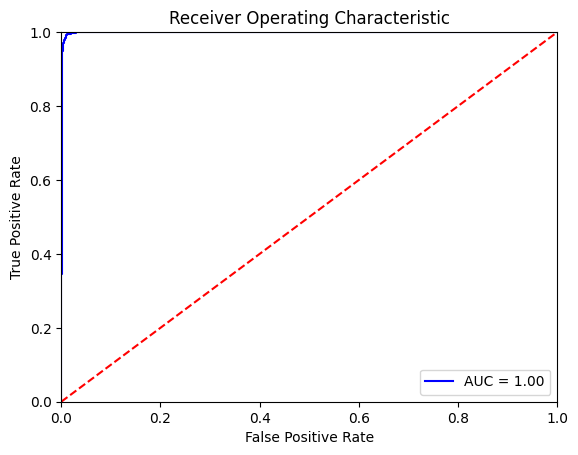

In [38]:
def plot_roc_curve(y_true, model, X_test):
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_roc_curve(y_test, log_model, x_test)

In [39]:
coefficients_log = log_model.coef_
coefficients_log

array([[-1.63892473,  1.4194741 , -0.62177359,  0.53209172, -2.2190626 ,
        -1.75338951,  0.02128983, -0.15399144, -2.82517268,  0.63656989]])

<Axes: >

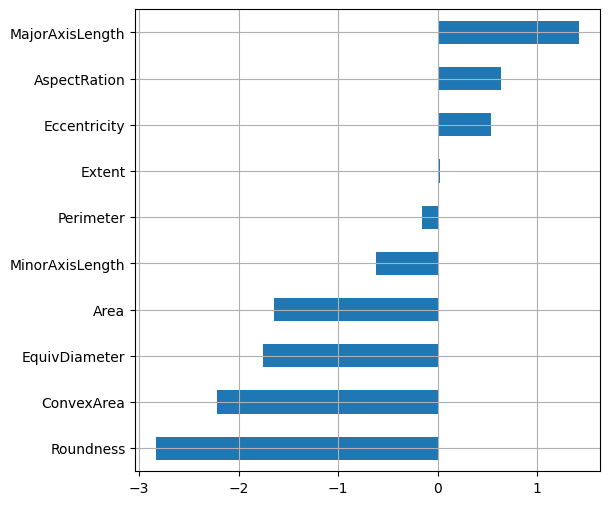

In [41]:
pd.DataFrame(data={'score': log_model.coef_[0]}, index=X_test.columns).sort_values(by='score').plot(kind='barh', grid=True, figsize=(6,6), legend=False)

In [42]:
X_train_sm = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.029230
         Iterations 16
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                13205
Model:                          Logit   Df Residuals:                    13194
Method:                           MLE   Df Model:                           10
Date:                Thu, 02 May 2024   Pseudo R-squ.:                  0.9576
Time:                        11:18:55   Log-Likelihood:                -385.99
converged:                       True   LL-Null:                       -9101.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.4291    149.169     -0.010      0.992    -293.795     290.936
Area         

In [43]:
parameters = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

grid_search = GridSearchCV(estimator=LogisticRegression(),
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=10,
                           n_jobs=-1)

grid_search.fit(x_train, y_train)

print("Лучшие параметры: ", grid_search.best_params_)

best_model_log = LogisticRegression(**grid_search.best_params_)
best_model_log.fit(x_train, y_train)

C:\Users\Dron\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
630 fits failed out of a total of 1400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dron\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dron\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Dron\AppData\Roaming\Python\Python312\site-pa

Лучшие параметры:  {'C': 1000, 'penalty': 'l2', 'solver': 'liblinear'}


LogisticRegression(C=1000, solver='liblinear')

In [44]:
best_log_score_train = best_model_log.score(x_train, y_train)
best_log_score_train

0.9900037864445286

In [45]:
best_log_score = best_model_log.score(x_test, y_test)
best_log_score

0.991821899136756

In [46]:
y_pred_log_best = best_model_log.predict(x_test)

In [47]:
print(classification_report(y_test, y_pred_log_best))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2038
           1       0.99      1.00      0.99      2364

    accuracy                           0.99      4402
   macro avg       0.99      0.99      0.99      4402
weighted avg       0.99      0.99      0.99      4402



In [48]:
confusion_matrix(y_test, y_pred_log_best)

array([[2013,   25],
       [  11, 2353]], dtype=int64)

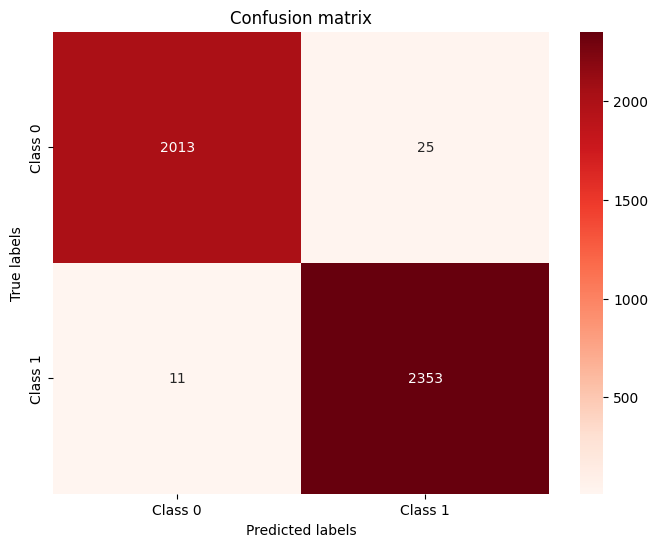

In [49]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_log_best), annot=True, fmt='d', cmap='Reds', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()

In [50]:
best_model_log.coef_

array([[ 11.57664541,  15.80362642,   5.66725251,   0.49135291,
        -22.52689336, -25.93854677,   0.04663162,   3.7055534 ,
         -1.12226262, -14.47879274]])

<Axes: >

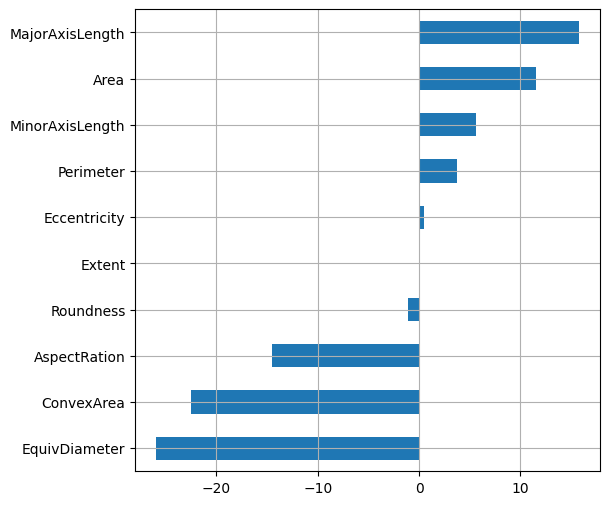

In [51]:
pd.DataFrame(data={'score': best_model_log.coef_[0]}, index=X_test.columns).sort_values(by='score').plot(kind='barh', grid=True, figsize=(6,6), legend=False)

In [55]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
scores = cross_val_score(best_model_log, X, y, scoring='roc_auc', cv=cv)
print(scores)
print("Средняя оценка кросс-валидации: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.99932878 0.99924262 0.99847648 0.99899072 0.99924032]
Средняя оценка кросс-валидации: 1.00 (+/- 0.00)


## SVM

In [44]:
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(x_train, y_train)

SVC(probability=True)

In [45]:
svm_score_train = svm_model.score(x_train, y_train)
svm_score_train

0.9906096175691026

In [46]:
svm_score = svm_model.score(x_test, y_test)
svm_score

0.9906860517946388

In [47]:
y_pred_svm = svm_model.predict(x_test)
np.mean(y_test == y_pred_svm)

0.9906860517946388

In [48]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2038
           1       0.99      0.99      0.99      2364

    accuracy                           0.99      4402
   macro avg       0.99      0.99      0.99      4402
weighted avg       0.99      0.99      0.99      4402



In [49]:
confusion_matrix(y_test, y_pred_svm)

array([[2010,   28],
       [  13, 2351]], dtype=int64)

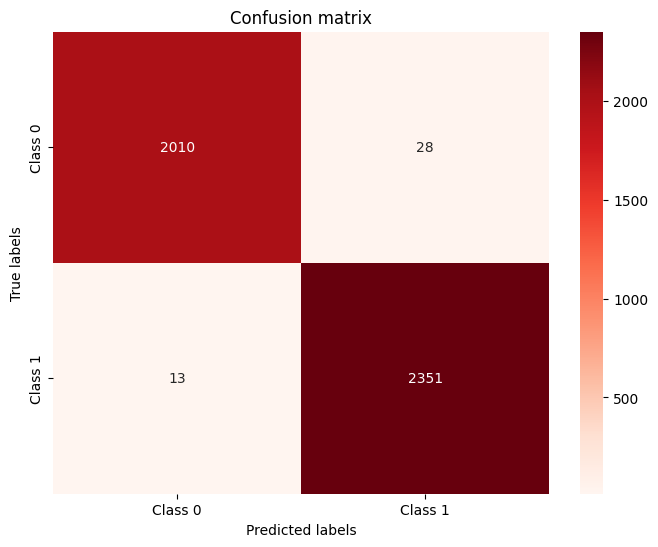

In [50]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Reds', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()

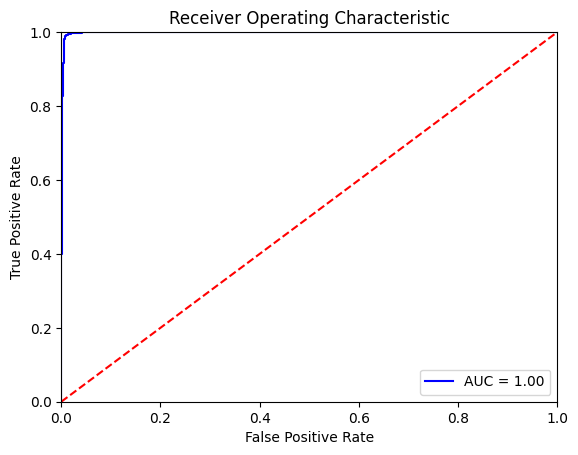

In [51]:
plot_roc_curve(y_test, svm_model, x_test)

In [52]:
parameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'gamma': ['scale', 'auto']}

grid_search = GridSearchCV(estimator=SVC(),
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=10,
                           n_jobs=-1)

grid_search.fit(x_train, y_train)

print("Лучшие параметры: ", grid_search.best_params_)

best_model_svc = SVC(**grid_search.best_params_)
best_model_svc.fit(x_train, y_train)

Лучшие параметры:  {'C': 1000, 'gamma': 'scale', 'kernel': 'linear'}


SVC(C=1000, kernel='linear')

In [55]:
best_svc_score_train = best_model_svc.score(x_train, y_train)
best_svc_score_train

0.9906853464596743

In [56]:
best_svc_score = best_model_svc.score(x_test, y_test)
best_svc_score

0.9909132212630622

In [57]:
y_pred_svc_best = best_model_svc.predict(x_test)

In [58]:
print(classification_report(y_test, y_pred_svc_best))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2038
           1       0.99      0.99      0.99      2364

    accuracy                           0.99      4402
   macro avg       0.99      0.99      0.99      4402
weighted avg       0.99      0.99      0.99      4402



In [59]:
confusion_matrix(y_test, y_pred_svc_best)

array([[2010,   28],
       [  12, 2352]], dtype=int64)

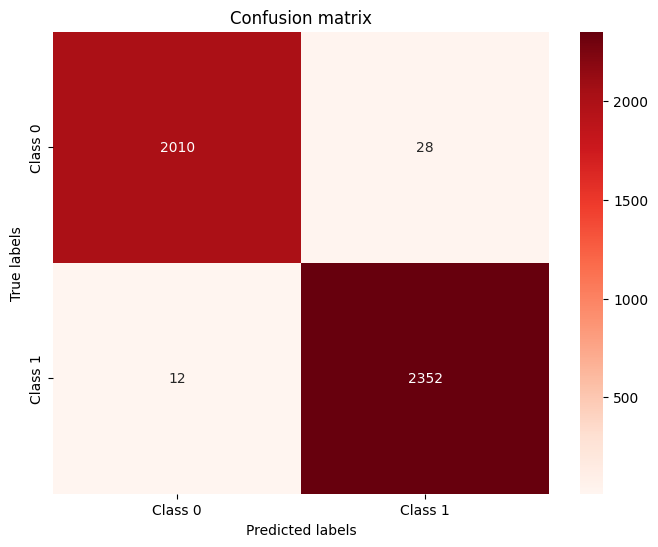

In [60]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_svc_best), annot=True, fmt='d', cmap='Reds', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()

## KNN

In [45]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [46]:
knn_score_train = knn_model.score(x_train, y_train)
knn_score_train

0.9901552442256721

In [47]:
knn_score = knn_model.score(x_test, y_test)
knn_score

0.9893230349840981

In [64]:
y_pred_knn = knn_model.predict(x_test)
np.mean(y_test == y_pred_knn)

0.9900045433893685

In [65]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2038
           1       0.99      0.99      0.99      2364

    accuracy                           0.99      4402
   macro avg       0.99      0.99      0.99      4402
weighted avg       0.99      0.99      0.99      4402



In [66]:
confusion_matrix(y_test, y_pred_knn)

array([[2010,   28],
       [  16, 2348]], dtype=int64)

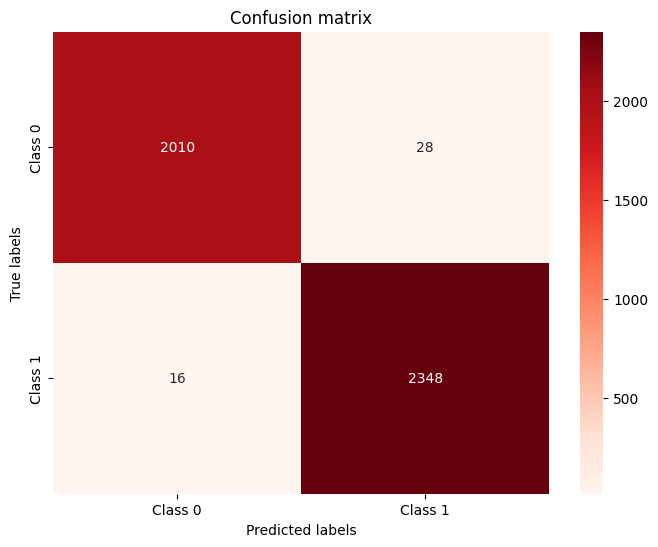

In [67]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Reds', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()

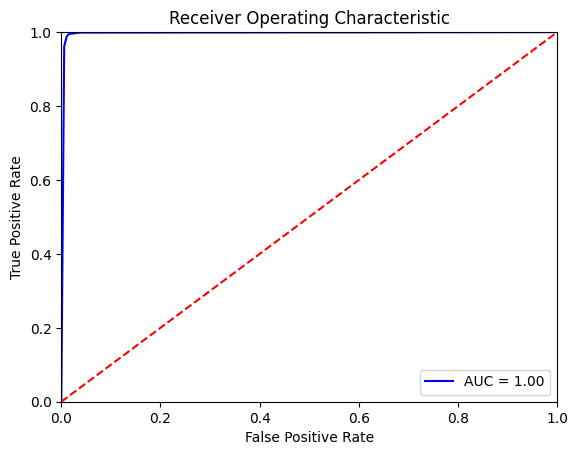

In [68]:
plot_roc_curve(y_test, knn_model, x_test)

## Bayes

In [39]:
bayes_model = GaussianNB()
bayes_model.fit(x_train, y_train)

GaussianNB()

In [40]:
bayes_score_train = bayes_model.score(x_train, y_train)
bayes_score_train

0.9874290041650889

In [41]:
bayes_score = bayes_model.score(x_test, y_test)
bayes_score

0.9888686960472512

In [42]:
y_pred_bayes = bayes_model.predict(x_test)
np.mean(y_test == y_pred_bayes)

0.9888686960472512

In [43]:
print(classification_report(y_test, y_pred_bayes))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2038
           1       0.98      1.00      0.99      2364

    accuracy                           0.99      4402
   macro avg       0.99      0.99      0.99      4402
weighted avg       0.99      0.99      0.99      4402



In [44]:
confusion_matrix(y_test, y_pred_bayes)

array([[1995,   43],
       [   6, 2358]], dtype=int64)

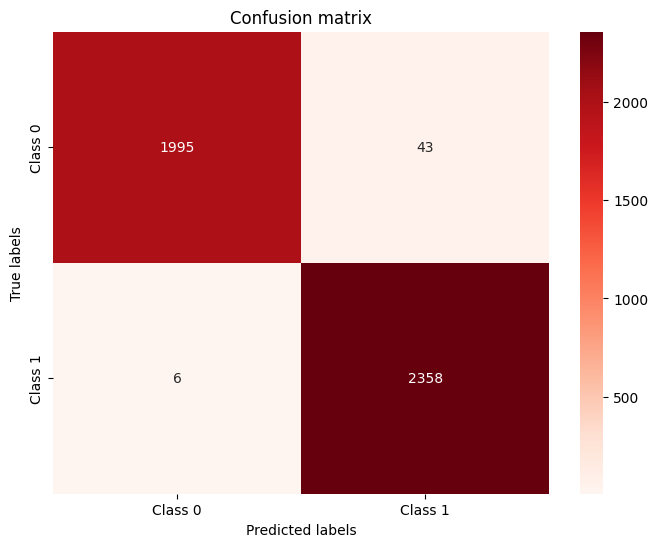

In [75]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_bayes), annot=True, fmt='d', cmap='Reds', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()

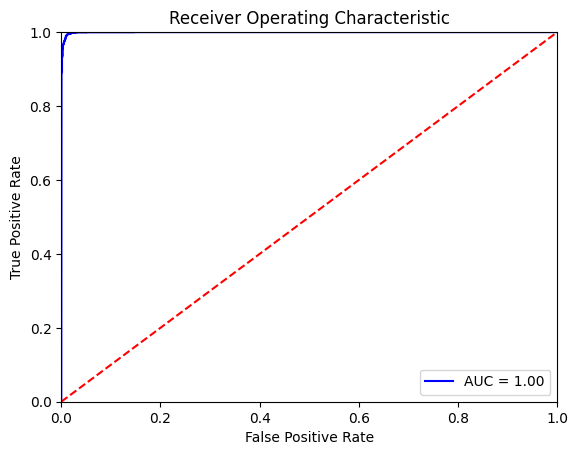

In [76]:
plot_roc_curve(y_test, bayes_model, x_test)

## Decision tree

In [77]:
tree_model = DecisionTreeClassifier(max_depth=6)
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [78]:
tree_score_train = tree_model.score(x_train, y_train)
tree_score_train

0.9921241953805376

In [79]:
tree_score = tree_model.score(x_test, y_test)
tree_score

0.9893230349840981

In [80]:
y_pred_tree = tree_model.predict(x_test)
np.mean(y_test == y_pred_tree)

0.9893230349840981

In [81]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2038
           1       0.99      0.99      0.99      2364

    accuracy                           0.99      4402
   macro avg       0.99      0.99      0.99      4402
weighted avg       0.99      0.99      0.99      4402



In [82]:
confusion_matrix(y_test, y_pred_tree)

array([[2003,   35],
       [  12, 2352]], dtype=int64)

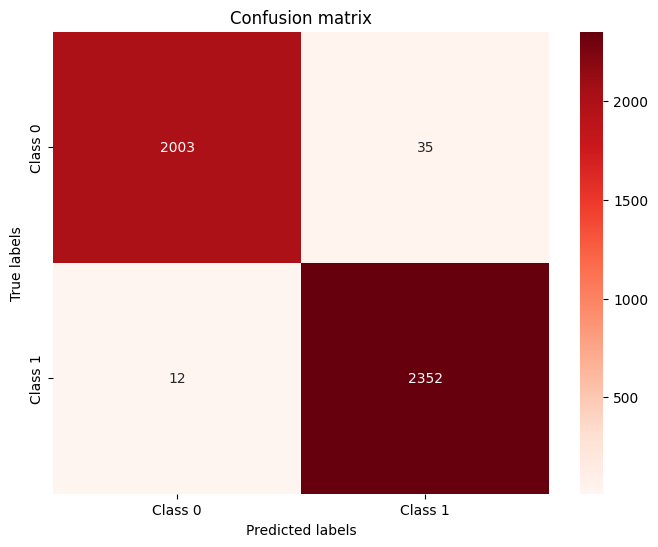

In [83]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', cmap='Reds', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()

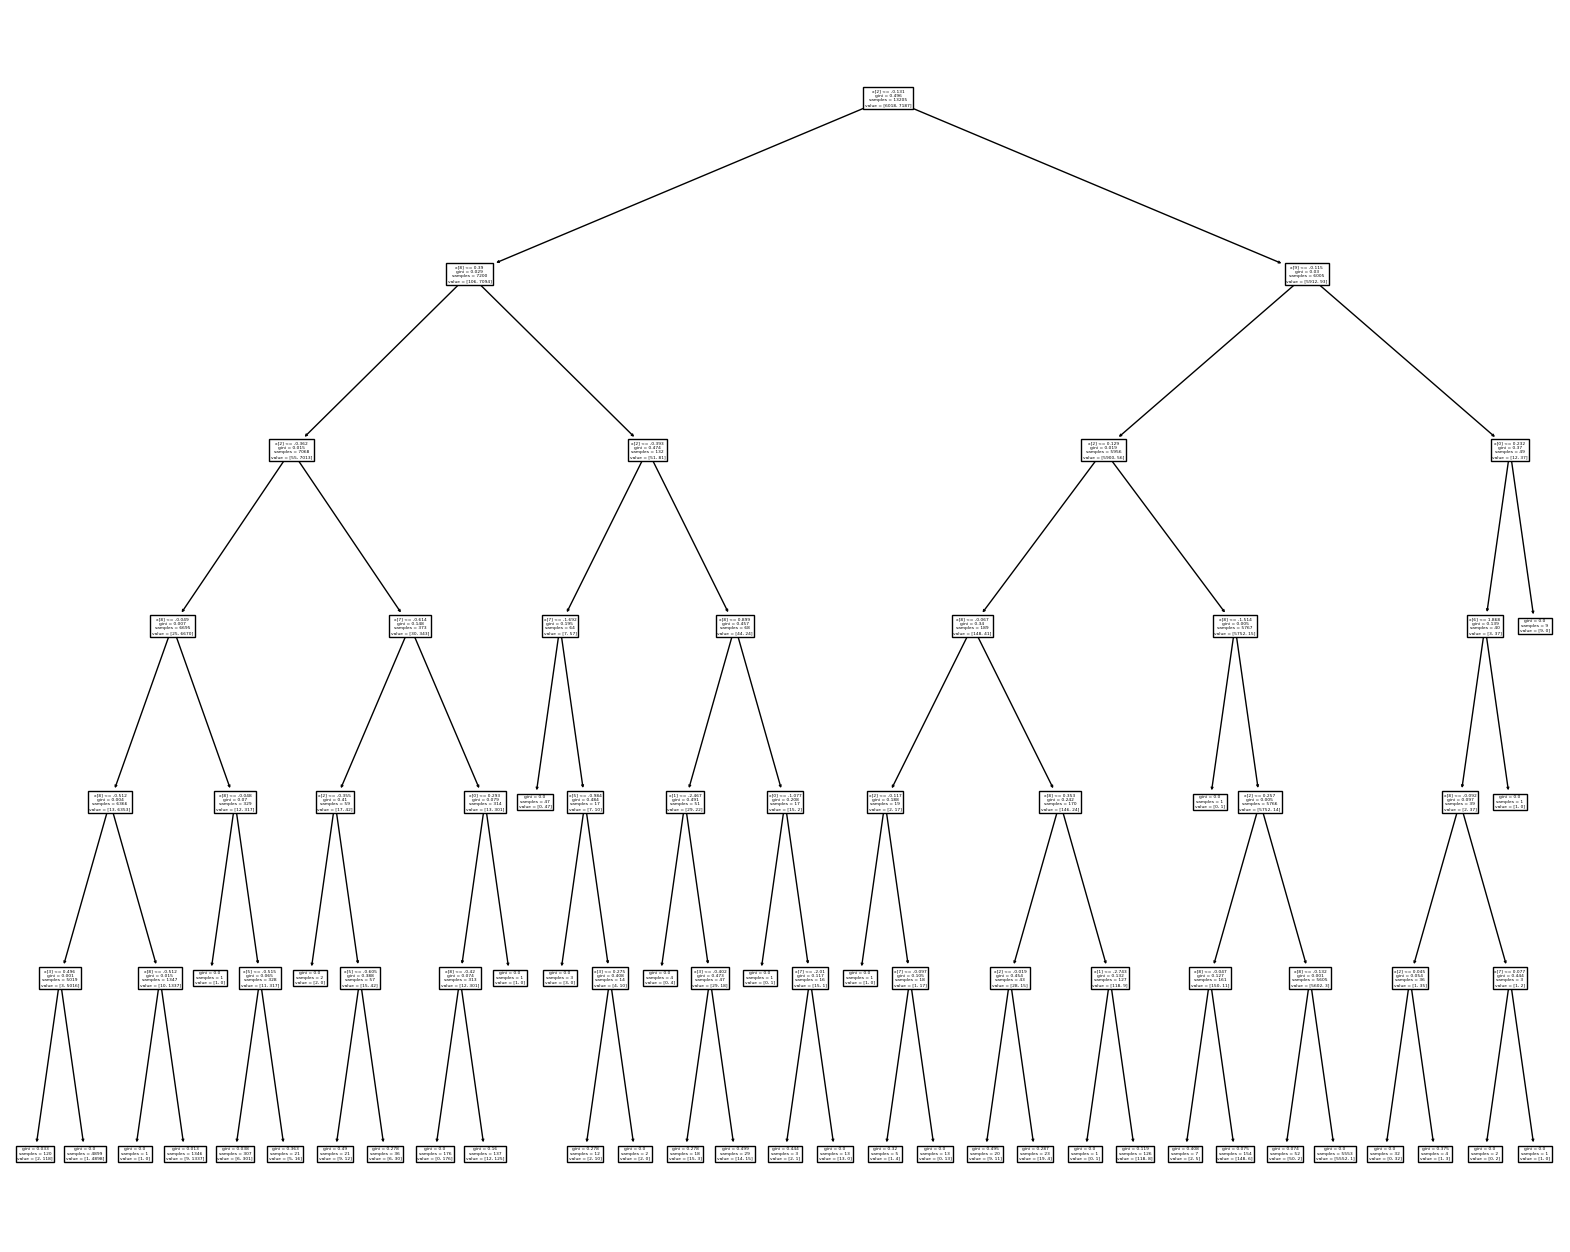

In [84]:
plt.figure(figsize=(20,16))
plot_tree(tree_model)
plt.show()

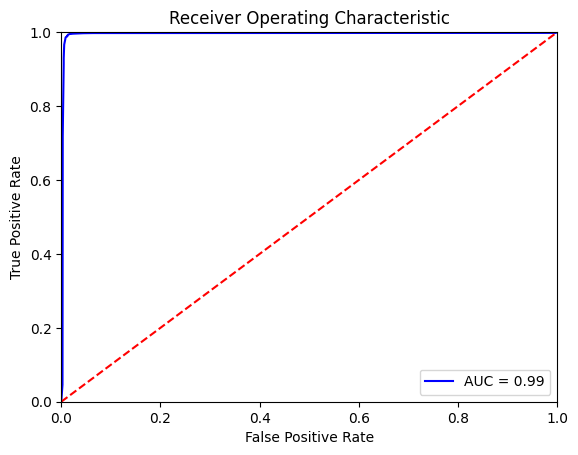

In [85]:
plot_roc_curve(y_test, tree_model, x_test)

In [65]:
parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': [None, 5, 6, 7, 8, 9, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}

grid_search_tree = GridSearchCV(estimator=DecisionTreeClassifier(),
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=10,
                           n_jobs=-1)

grid_search_tree.fit(x_train, y_train)

print("Лучшие параметры: ", grid_search_tree.best_params_)

best_model_tree = DecisionTreeClassifier(**grid_search_tree.best_params_)
best_model_tree.fit(x_train, y_train)

C:\Users\Dron\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1260 fits failed out of a total of 3780.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
567 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dron\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dron\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Dron\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 638, in _validate_params
    valida

Лучшие параметры:  {'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2}


DecisionTreeClassifier(max_depth=5, max_features='log2', min_samples_leaf=4)

In [66]:
best_tree_score_train = best_model_tree.score(x_train, y_train)
best_tree_score_train

0.9907610753502462

In [67]:
best_tree_score = best_model_tree.score(x_test, y_test)
best_tree_score

0.9868241708314403

In [68]:
y_best_pred_tree = best_model_tree.predict(x_test)
np.mean(y_test == y_best_pred_tree)

0.9868241708314403

In [69]:
print(classification_report(y_test, y_best_pred_tree))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2038
           1       0.99      0.99      0.99      2364

    accuracy                           0.99      4402
   macro avg       0.99      0.99      0.99      4402
weighted avg       0.99      0.99      0.99      4402



In [70]:
confusion_matrix(y_test, y_best_pred_tree)

array([[2004,   34],
       [  24, 2340]], dtype=int64)

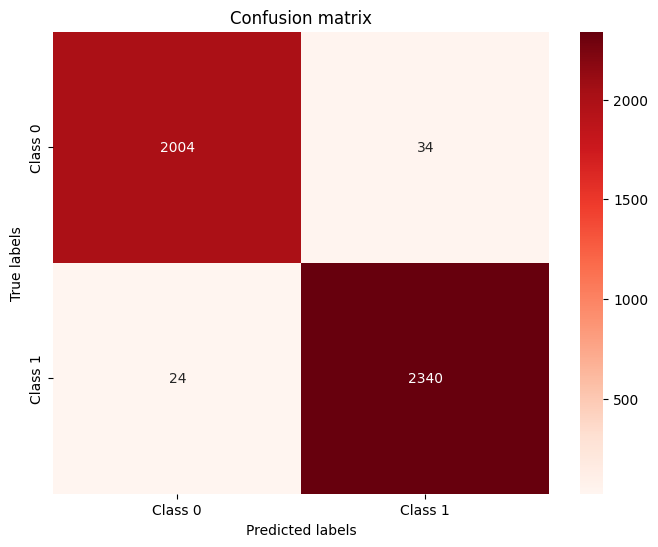

In [71]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_best_pred_tree), annot=True, fmt='d', cmap='Reds', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()

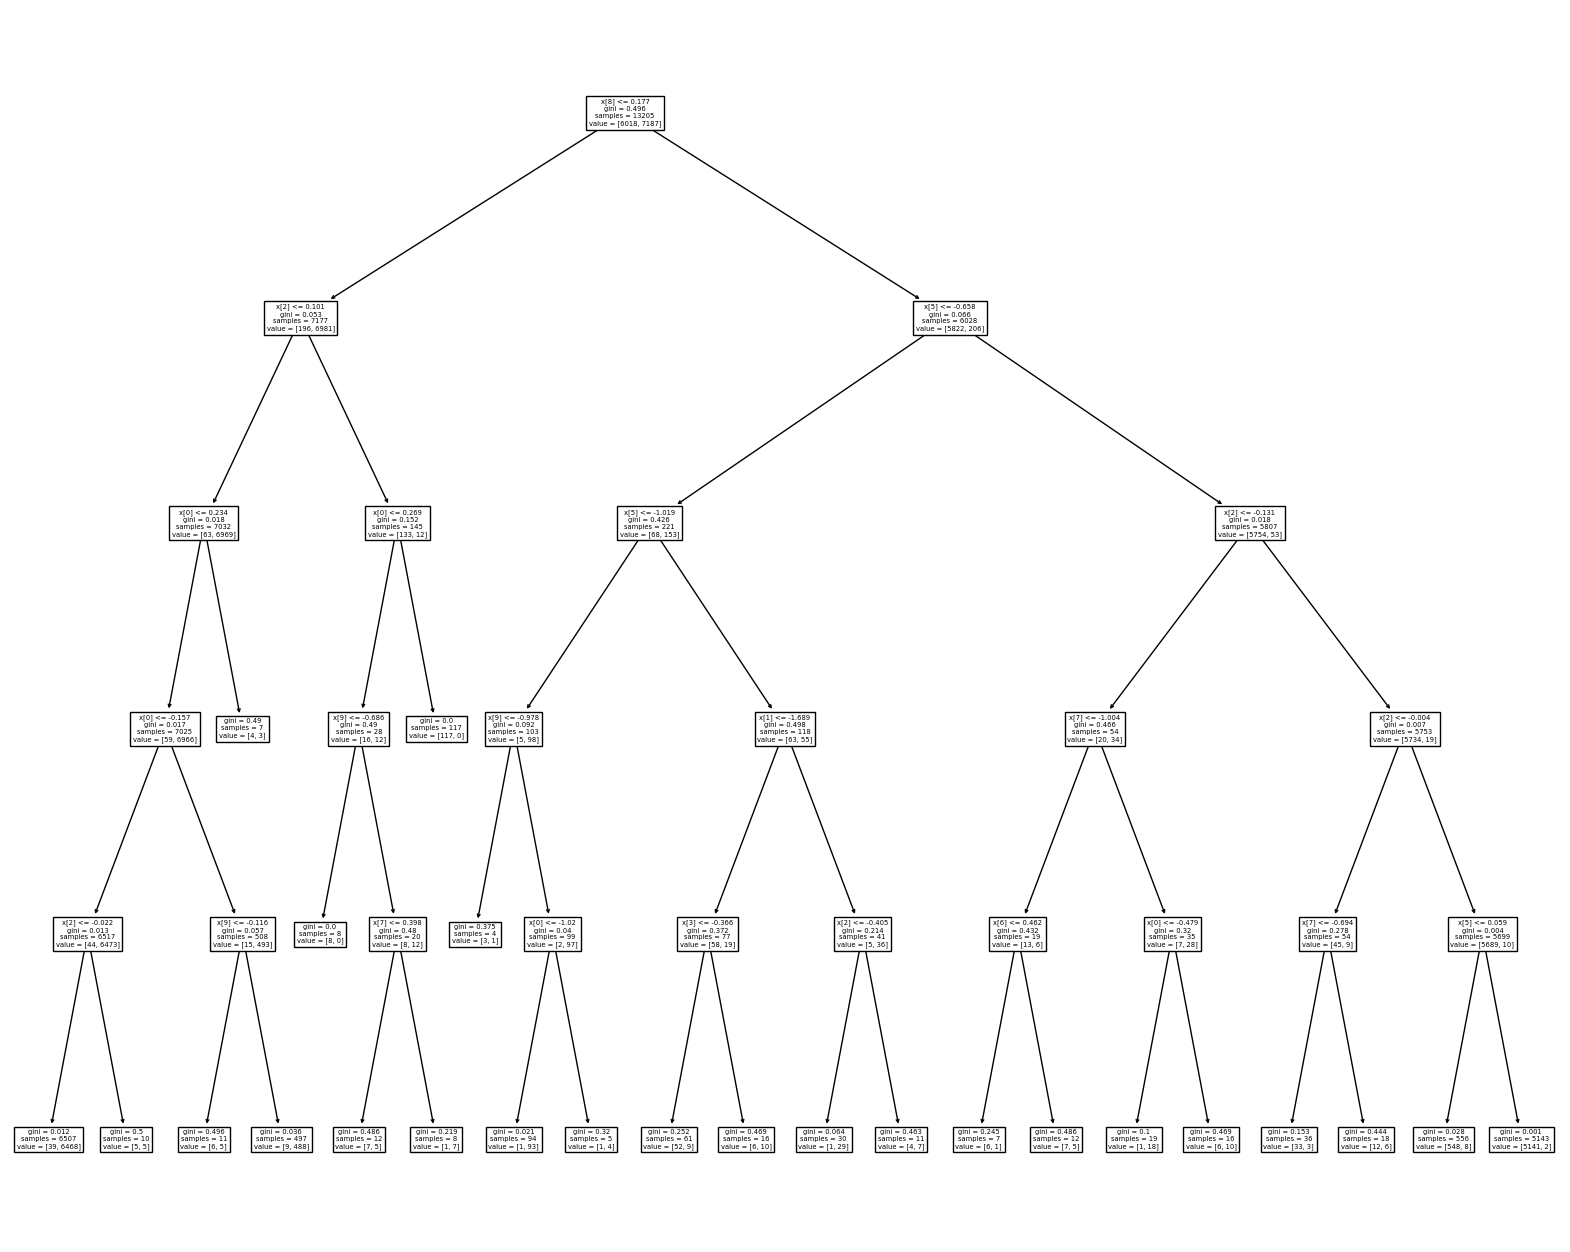

In [72]:
plt.figure(figsize=(20,16))
plot_tree(best_model_tree)
plt.show()

## GradBoosting

In [67]:
gradboost_model = GradientBoostingClassifier()
gradboost_model.fit(x_train, y_train)

GradientBoostingClassifier()

In [68]:
gradboost_score_train = gradboost_model.score(x_train, y_train)
gradboost_score_train

0.9937902309731163

In [69]:
gradboost_score = gradboost_model.score(x_test, y_test)
gradboost_score

0.9890958655156747

In [70]:
y_pred_grad = gradboost_model.predict(x_test)
np.mean(y_test == y_pred_grad)

0.9890958655156747

In [71]:
print(classification_report(y_test, y_pred_grad))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2038
           1       0.99      0.99      0.99      2364

    accuracy                           0.99      4402
   macro avg       0.99      0.99      0.99      4402
weighted avg       0.99      0.99      0.99      4402



In [72]:
confusion_matrix(y_test, y_pred_grad)

array([[2007,   31],
       [  17, 2347]], dtype=int64)

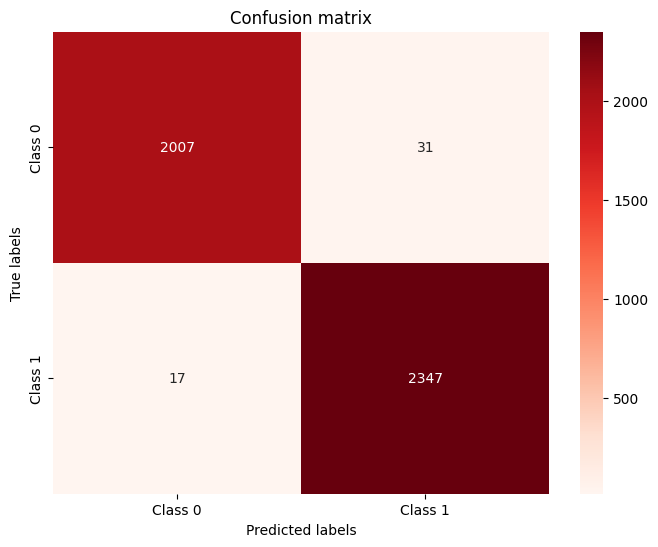

In [73]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_grad), annot=True, fmt='d', cmap='Reds', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()

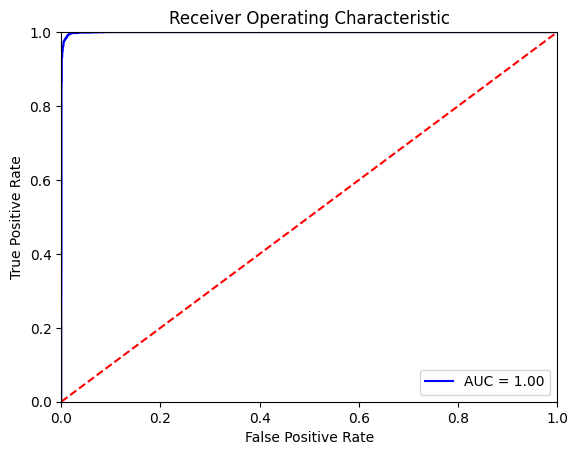

In [74]:
plot_roc_curve(y_test, gradboost_model, x_test)

## AdaBoost

In [75]:
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(x_train, y_train)

AdaBoostClassifier()

In [76]:
adaboost_score_train = adaboost_model.score(x_train, y_train)
adaboost_score_train

0.9908368042408179

In [77]:
adaboost_score = adaboost_model.score(x_test, y_test)
adaboost_score

0.989777373920945

In [78]:
y_pred_ada= adaboost_model.predict(x_test)
np.mean(y_test == y_pred_ada)

0.989777373920945

In [79]:
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2038
           1       0.99      0.99      0.99      2364

    accuracy                           0.99      4402
   macro avg       0.99      0.99      0.99      4402
weighted avg       0.99      0.99      0.99      4402



In [80]:
confusion_matrix(y_test, y_pred_ada)

array([[2006,   32],
       [  13, 2351]], dtype=int64)

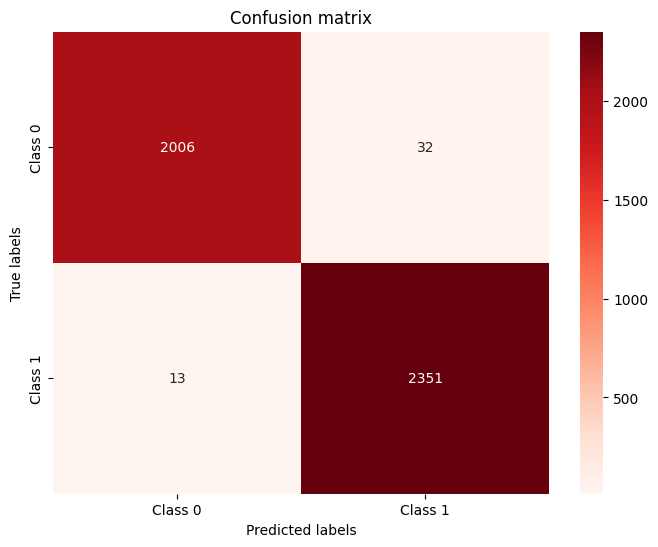

In [81]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_ada), annot=True, fmt='d', cmap='Reds', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()

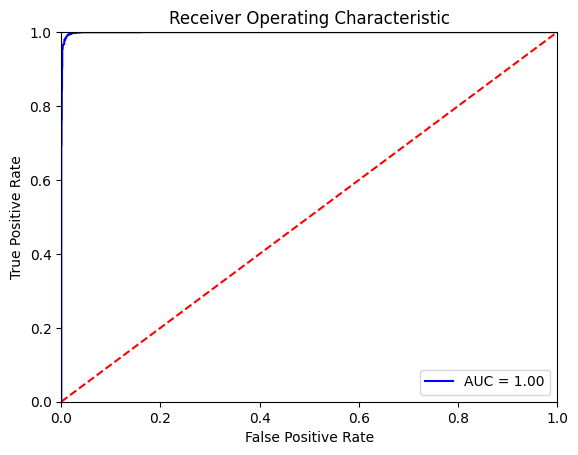

In [82]:
plot_roc_curve(y_test, adaboost_model, x_test)

## RandomForest

In [90]:
forest_model = RandomForestClassifier(max_depth=6)
forest_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=6)

In [91]:
forest_score_train = forest_model.score(x_train, y_train)
forest_score_train

0.9925785687239682

In [92]:
forest_score = forest_model.score(x_test, y_test)
forest_score

0.9906860517946388

In [93]:
y_pred_forest = forest_model.predict(x_test)
np.mean(y_test == y_pred_forest)

0.9906860517946388

In [94]:
print(classification_report(y_test, y_pred_forest))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2038
           1       0.99      0.99      0.99      2364

    accuracy                           0.99      4402
   macro avg       0.99      0.99      0.99      4402
weighted avg       0.99      0.99      0.99      4402



In [95]:
confusion_matrix(y_test, y_pred_forest)

array([[2011,   27],
       [  14, 2350]], dtype=int64)

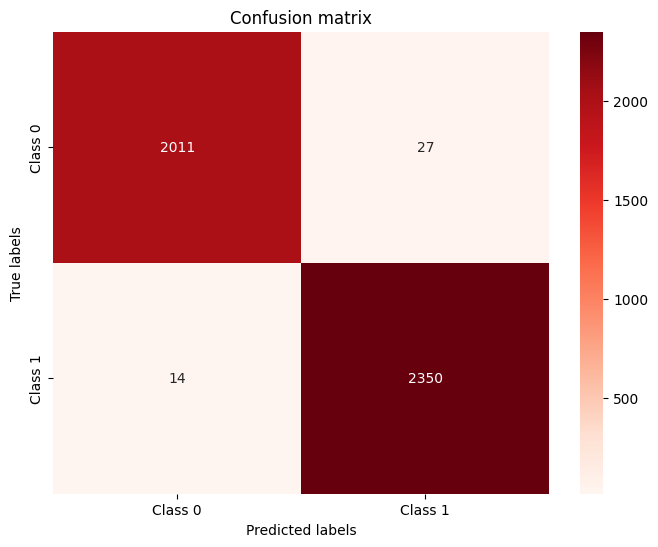

In [96]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_forest), annot=True, fmt='d', cmap='Reds', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()

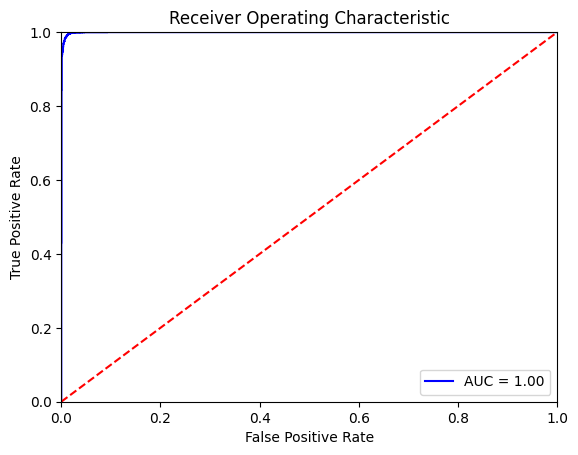

In [97]:
plot_roc_curve(y_test, forest_model, x_test)

## OneRule

In [166]:
import pandas as pd
import numpy as np

df_one = df_clean.copy()
df_one = df_one.sample(frac=1).reset_index(drop=True)
train_df = df_one[:12000]  
test_df = df_one[12000:] 

test_df_pred = test_df.drop(columns=['Class'])

array_list = []

for column in train_df.columns[:-1]:
    crosstab = pd.crosstab(train_df[column], train_df['Class'])
    crosstab['true'] = crosstab.apply(lambda row: row.iloc[1] if row.iloc[1] >= row.iloc[0] else 0, axis=1)
    crosstab['false'] = crosstab.apply(lambda row: row.iloc[0] if row.iloc[0] > row.iloc[1] else 0, axis=1)
    crosstab['not_true'] = crosstab.apply(lambda row: row.iloc[1] if row.iloc[1] < row.iloc[0] else 0, axis=1)
    crosstab['not_false'] = crosstab.apply(lambda row: row.iloc[0] if row.iloc[0] <= row.iloc[1] else 0, axis=1)


    true_sum = crosstab['true'].sum()
    false_sum = crosstab['false'].sum()
    not_true_sum = crosstab['not_true'].sum()
    not_false_sum = crosstab['not_false'].sum()

    array = np.array([true_sum, false_sum, not_true_sum, not_false_sum])
    array_list.append(array)

array_of_arrays = np.array(array_list)

results = []

for array in array_of_arrays:

  Accuracy = (array[0] + array[1]) / (array[0] + array[1] + array[2] + array[3])
  results.append(Accuracy)

array_of_Accuracy = np.array(results)


df_features = pd.DataFrame(df_one.columns[:-1], columns=['Predictors'])
df_accuracy = pd.DataFrame(array_of_Accuracy, columns=['Accuracy'])

df = pd.concat([df_features, df_accuracy], axis=1)


max_accuracy_index = df['Accuracy'].idxmax()
max_accuracy_predictor = df.loc[max_accuracy_index, 'Predictors']


crosstab_accuracy = pd.crosstab(train_df[max_accuracy_predictor], train_df['Class'])
crosstab_accuracy['Predictions'] = crosstab_accuracy.apply(lambda row: 1 if row.iloc[1] >= row.iloc[0] else 0, axis=1)



def classify(row):
    if row[max_accuracy_predictor] in crosstab_accuracy.index:
        return crosstab_accuracy.loc[row[max_accuracy_predictor], 'Predictions']
    else:
        return 0


test_df_pred['Classification'] = test_df_pred.apply(classify, axis=1)
# print(test_df['Classification'].to_string(index=False))
test_df_pred

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Classification
12000,8745,159.423427,70.609007,0.896570,8993,105.520045,0.701058,386.143,0.737010,2.257834,0
12001,9399,165.071744,73.453605,0.895541,9636,109.394600,0.556978,391.483,0.770665,2.247293,0
12002,8101,152.042630,68.441323,0.892955,8294,101.560394,0.626915,362.624,0.774168,2.221503,0
12003,6687,160.787994,54.409601,0.941005,6867,92.272167,0.598443,359.198,0.651288,2.955140,0
12004,6715,151.099323,57.502851,0.924755,6924,92.465148,0.763849,352.730,0.678221,2.627684,0
...,...,...,...,...,...,...,...,...,...,...,...
17602,6053,158.235235,49.549845,0.949707,6244,87.789059,0.755869,358.230,0.592730,3.193456,0
17603,8334,152.289612,70.340495,0.886939,8503,103.010574,0.657670,366.072,0.781502,2.165035,0
17604,6296,165.770018,49.062896,0.955197,6459,89.533883,0.446177,365.992,0.590652,3.378725,0
17605,9488,160.299363,76.430027,0.879014,9730,109.911313,0.626395,390.866,0.780421,2.097335,0


In [167]:
np.unique(test_df_pred['Classification'], return_counts=True)

(array([0], dtype=int64), array([5607], dtype=int64))

In [168]:
np.unique(test_df["Class"], return_counts=True)

(array([0, 1], dtype=int64), array([2571, 3036], dtype=int64))

In [169]:
np.mean(test_df["Class"] == test_df_pred["Classification"])

0.45853397538790797

In [177]:
print(classification_report(test_df["Class"], test_df_pred["Classification"], zero_division=1))

              precision    recall  f1-score   support

           0       0.46      1.00      0.63      2571
           1       1.00      0.00      0.00      3036

    accuracy                           0.46      5607
   macro avg       0.73      0.50      0.31      5607
weighted avg       0.75      0.46      0.29      5607



In [175]:
confusion_matrix(test_df["Class"], test_df_pred["Classification"])

array([[2571,    0],
       [3036,    0]], dtype=int64)

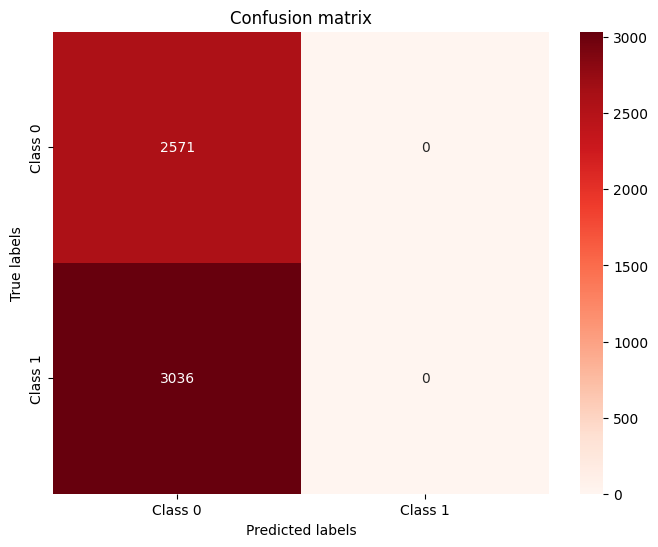

In [172]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(test_df["Class"], test_df_pred["Classification"]), annot=True, fmt='d', cmap='Reds', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()

In [197]:
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_np = X_train.values
y_train_np = y_train.values
X_test_np = X_test.values

In [198]:
onerule_model = OneRClassifier()
onerule_model.fit(X_train_np, y_train_np)

OneRClassifier()

In [199]:
onerule_score_train = onerule_model.score(X_train_np, y_train_np)
onerule_score_train

1.0

In [200]:
onerule_score = onerule_model.score(X_test_np, y_test)
onerule_score

0.44849706744868034

In [201]:
y_pred_onerule = onerule_model.predict(X_test_np)
np.mean(y_test == y_pred_onerule)

0.44849706744868034

In [202]:
print(classification_report(y_test, y_pred_onerule, zero_division=1))

              precision    recall  f1-score   support

           0       0.45      1.00      0.62      2447
           1       1.00      0.00      0.00      3009

    accuracy                           0.45      5456
   macro avg       0.72      0.50      0.31      5456
weighted avg       0.75      0.45      0.28      5456



In [135]:
confusion_matrix(y_test, y_pred_onerule)

array([[2447,    0],
       [3009,    0]], dtype=int64)

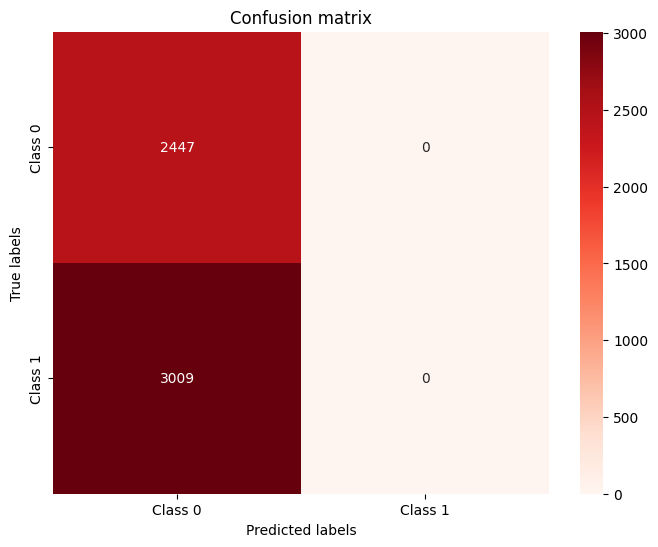

In [136]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_onerule), annot=True, fmt='d', cmap='Reds', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()

## Perceptron

In [101]:
perceptron_model = Perceptron()
perceptron_model.fit(x_train, y_train)

Perceptron()

In [104]:
perceptron_score_train = perceptron_model.score(x_train, y_train)
perceptron_score_train

0.9869360597208698

In [105]:
perceptron_score = perceptron_model.score(x_test, y_test)
perceptron_score

0.989399962142722

In [107]:
y_pred_perceptron = perceptron_model.predict(x_test)
np.mean(y_test == y_pred_perceptron)

0.989399962142722

In [108]:
print(classification_report(y_test, y_pred_perceptron))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2425
           1       0.98      1.00      0.99      2858

    accuracy                           0.99      5283
   macro avg       0.99      0.99      0.99      5283
weighted avg       0.99      0.99      0.99      5283



In [109]:
confusion_matrix(y_test, y_pred_perceptron)

array([[2375,   50],
       [   6, 2852]], dtype=int64)

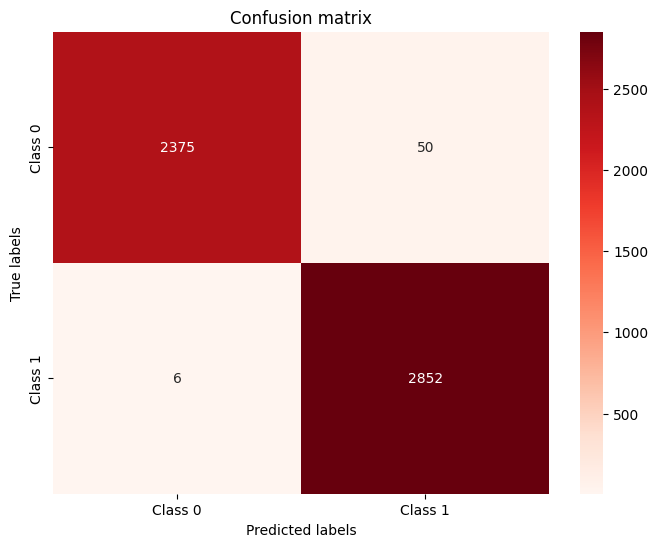

In [111]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_perceptron), annot=True, fmt='d', cmap='Reds', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()

## Ансамбль из моделей классификации

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

standartscaler = StandardScaler()
x_train = standartscaler.fit_transform(X_train)
x_test = standartscaler.transform(X_test)

In [205]:
def get_models():
    models = []
    models.append(('log_reg', LogisticRegression()))
    models.append(('knn', KNeighborsClassifier()))
    models.append(('bayes', GaussianNB()))
    models.append(('svm', SVC(probability=True)))
    models.append(('tree', DecisionTreeClassifier()))
    return models
    
def fit_predict_ensemble(models, X_train, X_test, y_train):
    X_ensamble = []
    for name, model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(X_test)
        X_ensamble.append(y_pred)

    return np.array(X_ensamble)


In [206]:
models = get_models()
new_model = fit_predict_ensemble(models, x_train, x_test, y_train)
print(new_model.shape)

(5, 5283)


In [207]:
all_pred = np.where(np.mean(new_model, axis=0) >= 0.5, 1, 0)
score = accuracy_score(y_test, all_pred)
print(f'Accuracy ensemble: {score*100} %')

Accuracy ensemble: 98.7317811849328 %


In [95]:
print(classification_report(y_test, all_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2425
           1       0.99      1.00      0.99      2858

    accuracy                           0.99      5283
   macro avg       0.99      0.99      0.99      5283
weighted avg       0.99      0.99      0.99      5283



In [96]:
confusion_matrix(y_test, all_pred)

array([[2387,   38],
       [  12, 2846]], dtype=int64)

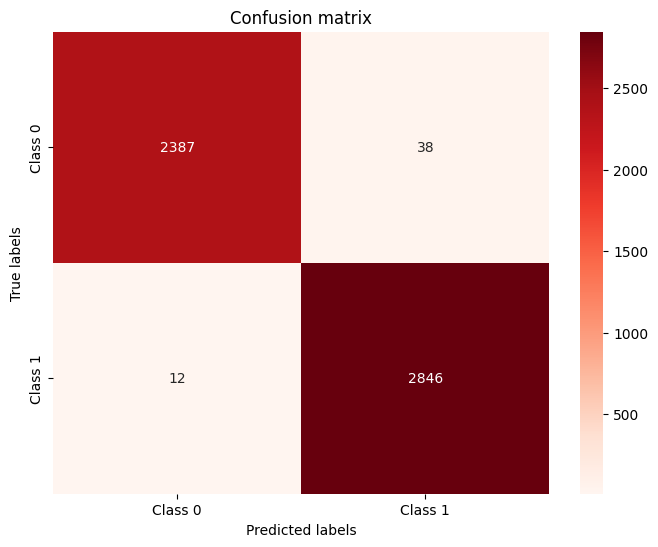

In [97]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, all_pred), annot=True, fmt='d', cmap='Reds', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()

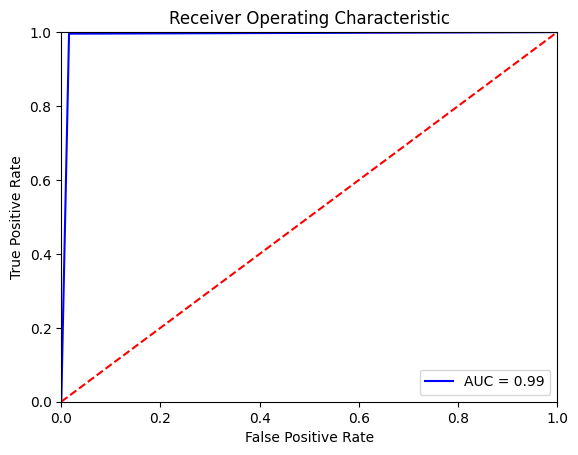

In [98]:
def plot_roc_curve(y_true, preds):
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_roc_curve(y_test, all_pred)

### Смешанный ансамбль

In [400]:
def get_models():
    models = []
    models.append(('log_reg', LogisticRegression()))
    models.append(('knn', KNeighborsClassifier()))
    # models.append(('bayes', GaussianNB()))
    models.append(('svm', SVC(probability=True)))
    models.append(('tree', DecisionTreeClassifier()))
    return models


def fit_ensemble(models, X_train, X_val, y_train, y_val):
    X_meta = []
    
    for name, model in models:
        model.fit(X_train, y_train)
        # y_pred = model.predict(x_val)
        # X_meta.append(y_pred.reshape(len(y_pred),1))
        y_pred = model.predict_proba(X_val)
        X_meta.append(y_pred)
    X_meta = np.hstack(X_meta)
    new_model = LogisticRegression() #SVC(probability=True)
    new_model.fit(X_meta, y_val)
    return new_model


def predict_ensemble(models, new_model, X_test):
    X_meta = []
    
    for name, model in models:
        # y_pred = model.predict(X_test)
        # X_meta.append(y_pred.reshape(len(y_pred),1))
        y_pred = model.predict_proba(X_test)
        X_meta.append(y_pred)
        
    X_meta = np.hstack(X_meta)

    return new_model.predict(X_meta), X_meta


In [401]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
standartscaler = StandardScaler()
x_train = standartscaler.fit_transform(X_train)
x_test = standartscaler.fit_transform(X_test)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.4, random_state=42)

In [402]:
print('Train: %s, Val: %s, Test: %s' % (x_train.shape, x_val.shape, x_test.shape))

Train: (6338, 10), Val: (4226, 10), Test: (7043, 10)


In [403]:
models = get_models()
new_model = fit_ensemble(models, x_train, x_val, y_train, y_val)
y_pred_ensemble, X_meta = predict_ensemble(models, new_model, x_test)
score = accuracy_score(y_test, y_pred_ensemble)
print(f'Accuracy ensemble: {score*100} %')

Accuracy ensemble: 99.03450234275168 %


In [404]:
print(classification_report(y_test, y_pred_ensemble))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3212
           1       0.99      0.99      0.99      3831

    accuracy                           0.99      7043
   macro avg       0.99      0.99      0.99      7043
weighted avg       0.99      0.99      0.99      7043



In [405]:
confusion_matrix(y_test, y_pred_ensemble)

array([[3170,   42],
       [  26, 3805]], dtype=int64)

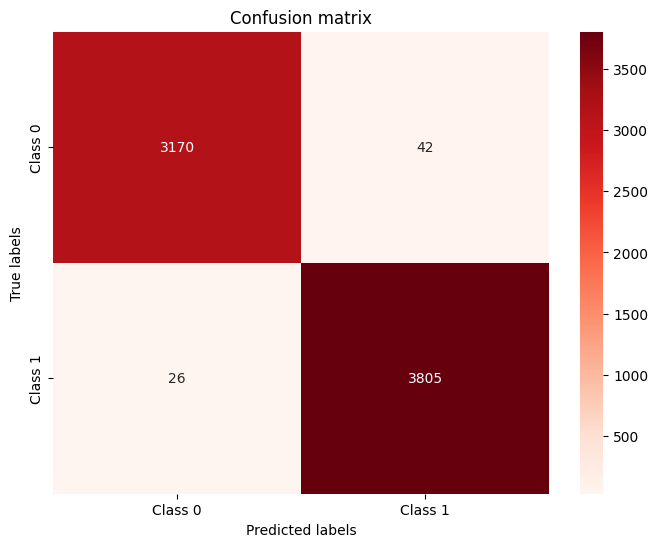

In [406]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_ensemble), annot=True, fmt='d', cmap='Reds', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()

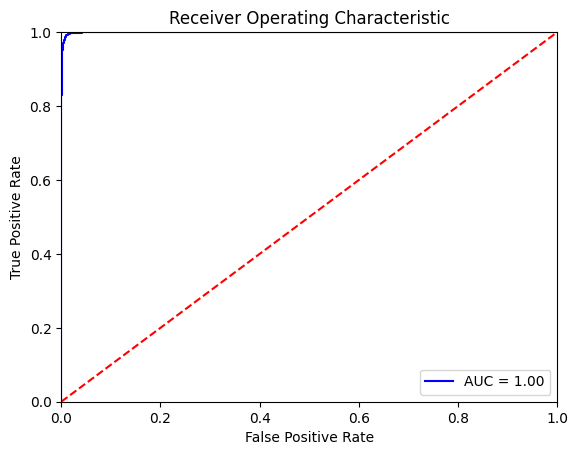

In [408]:
def plot_roc_curve(y_true, model, X_test):
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
   
plot_roc_curve(y_test, new_model, X_meta)

In [ ]:
# def plot_roc_curve(y_true, model, X_test):
#     probs = model.predict_proba(X_test)
#     preds = probs[:,1]
#     fpr, tpr, threshold = roc_curve(y_test, preds)
#     roc_auc = auc(fpr, tpr)
    
#     plt.title('Receiver Operating Characteristic')
#     plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
#     plt.legend(loc = 'lower right')
#     plt.plot([0, 1], [0, 1],'r--')
#     plt.xlim([0, 1])
#     plt.ylim([0, 1])
#     plt.ylabel('True Positive Rate')
#     plt.xlabel('False Positive Rate')
#     plt.show()

# plot_roc_curve(y_test, new_model, x_test)

## Избавляемся от мультиколлинеарности, исследуем важность признаков модели

In [170]:
new_df = df_clean.copy()
new_df = new_df.drop(['ConvexArea', 'EquivDiameter', 'Roundness', 'AspectRation', 'Area', 'Eccentricity'], axis=1)

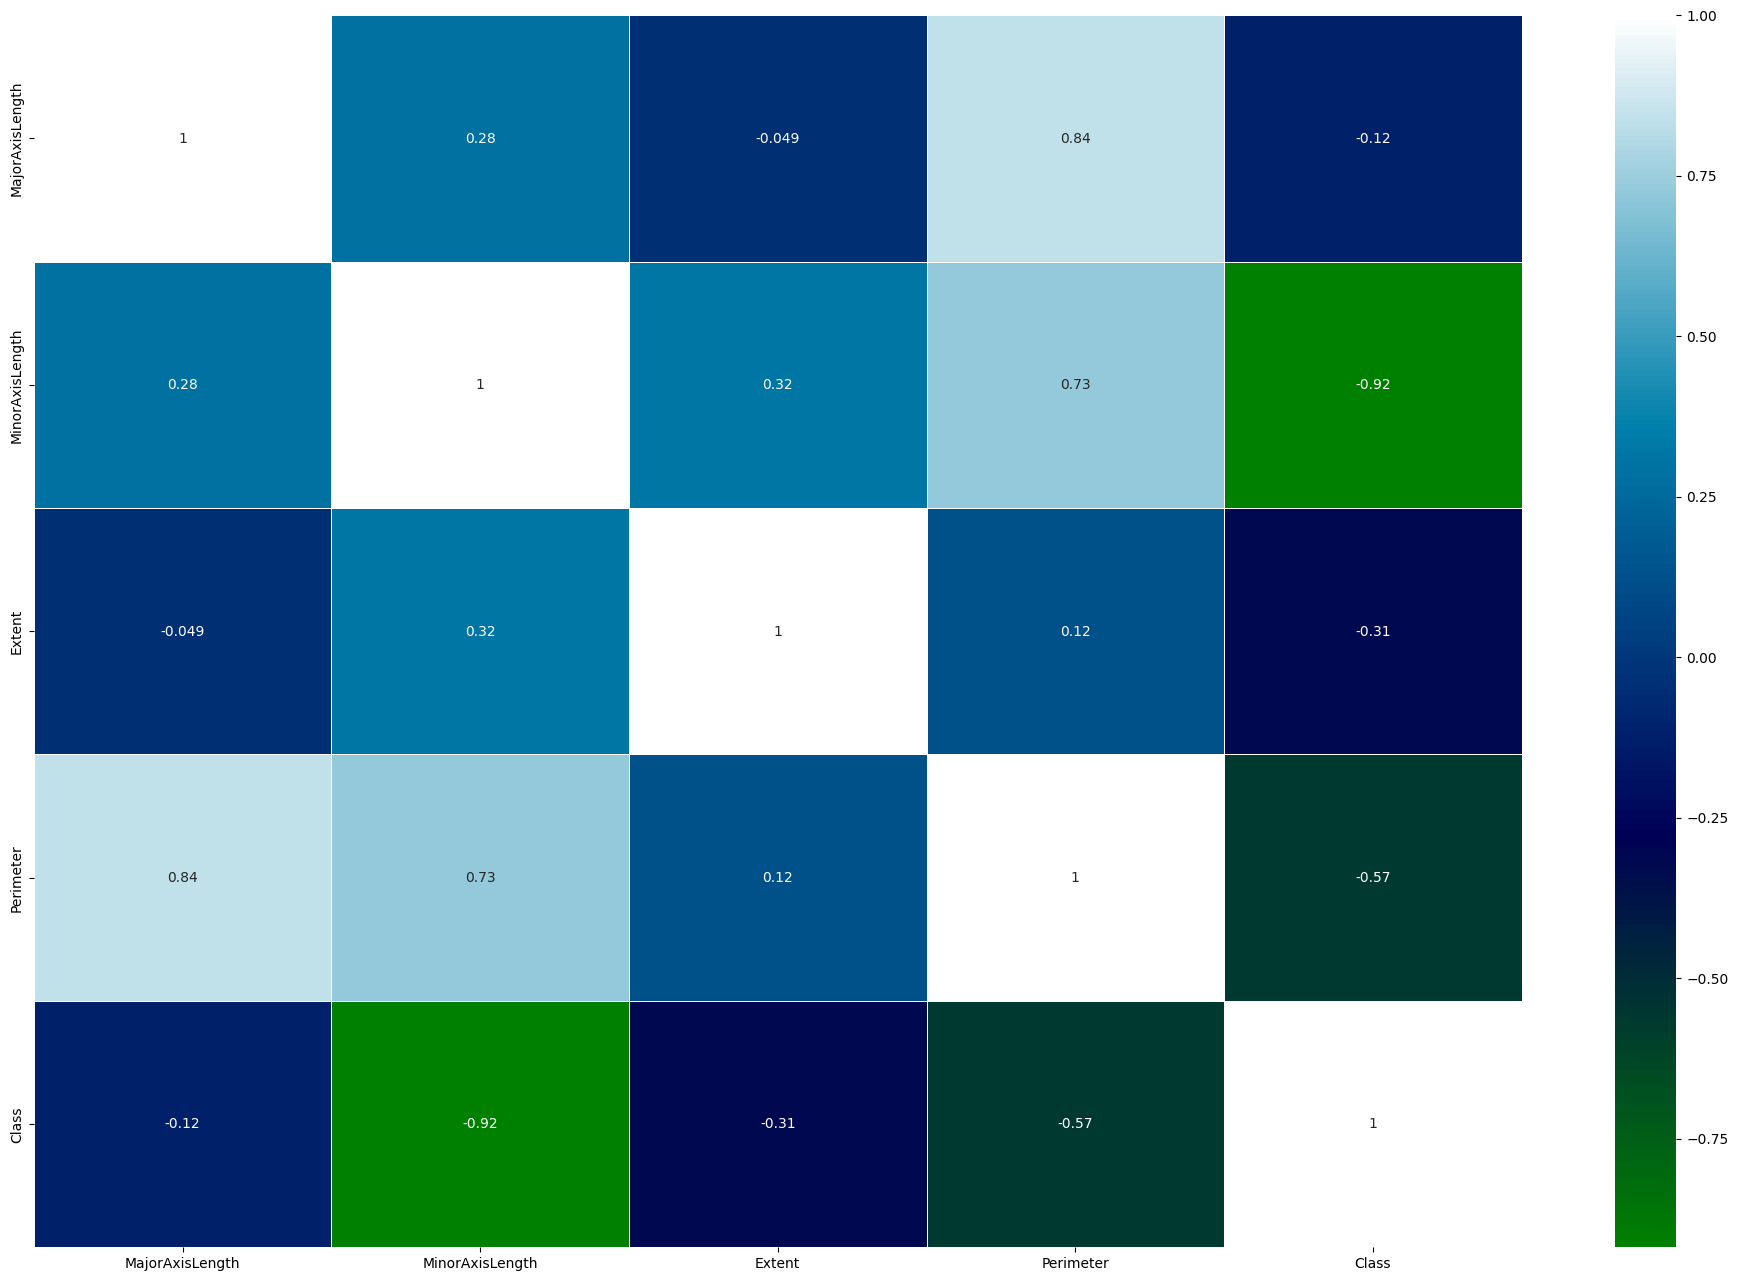

In [171]:
plt.figure(figsize=(24,16))
sns.heatmap(new_df.corr(), annot=True, linewidths=0.5, cmap='ocean')
plt.show()

In [172]:
X = new_df.drop('Class', axis=1)
X

,MajorAxisLength,MinorAxisLength,Extent,Perimeter
158,129.576759,63.762307,0.662234,314.656
186,136.303603,65.738475,0.594437,338.782
207,125.555431,59.626250,0.623491,307.304
218,127.013995,59.843292,0.610352,309.264
227,129.098407,60.416315,0.661375,308.106
...,...,...,...,...
18180,148.624571,51.029281,0.498594,332.960
18181,169.593996,58.141659,0.647461,385.506
18182,154.777085,52.908085,0.561287,342.253
18183,151.397924,51.474600,0.492399,343.371


In [173]:
y = new_df['Class']
y

158      1
186      1
207      1
218      1
227      1
        ..
18180    0
18181    0
18182    0
18183    0
18184    0
Name: Class, Length: 17607, dtype: int64

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
standartscaler = StandardScaler()
x_train = standartscaler.fit_transform(X_train)
x_test = standartscaler.fit_transform(X_test)

In [175]:
# log_model = LogisticRegression()
# log_model.fit(X_train, y_train)
log_model_new = LogisticRegression()
log_model_new.fit(x_train, y_train)

LogisticRegression()

In [176]:
log_score_train = log_model_new.score(x_train, y_train)
log_score_train

0.988640666414237

In [177]:
log_score = log_model_new.score(x_test, y_test)
log_score

0.989777373920945

In [183]:
df_log = pd.DataFrame(data={'score': log_model_new.coef_[0]}, index=X_test.columns).sort_values(by='score', ascending=True)
df_log

,score
MinorAxisLength,-9.579245
MajorAxisLength,-0.438001
Extent,-0.053876
Perimeter,2.300969


<Axes: >

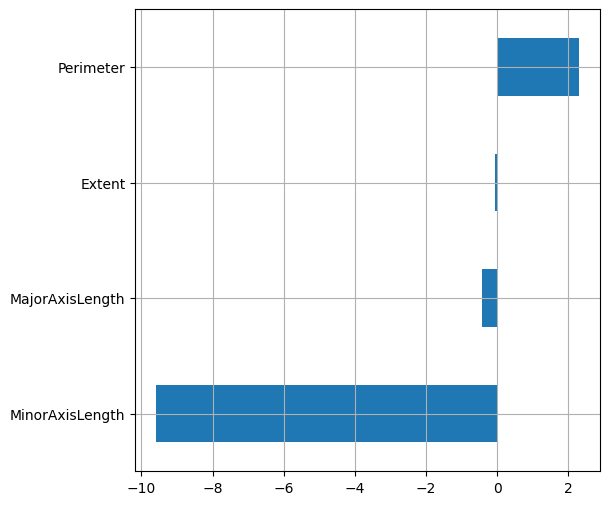

In [184]:
df_log.plot(kind='barh', grid=True, figsize=(6,6), legend=False)

In [109]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2038
           1       0.99      1.00      0.99      2364

    accuracy                           0.99      4402
   macro avg       0.99      0.99      0.99      4402
weighted avg       0.99      0.99      0.99      4402



In [110]:
confusion_matrix(y_test, y_pred_log)

array([[2011,   27],
       [  11, 2353]], dtype=int64)

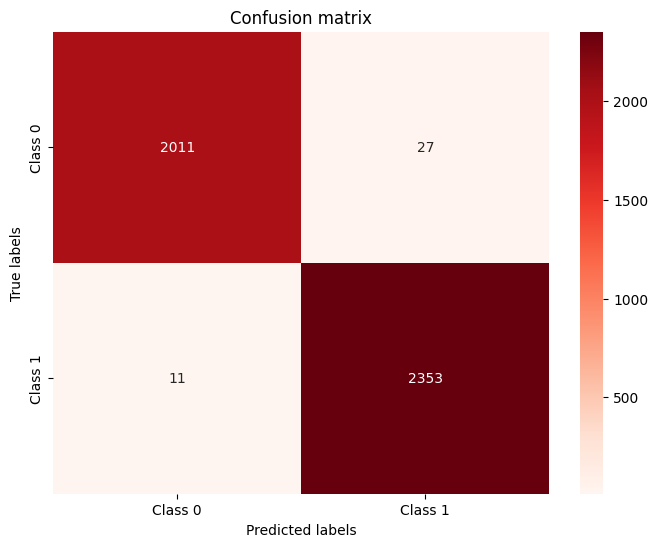

In [111]:
confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Reds', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()

In [112]:
pca = PCA(n_components=4)
X = pca.fit_transform(X)

In [113]:
print(X)

[[ 4.20034809e+01  1.84061166e+01 -5.99649409e-01 -1.07451390e-02]
 [ 1.73395505e+01  1.51967114e+01  2.95177557e+00 -5.29144577e-02]
 [ 5.10354995e+01  1.78084760e+01  1.72341948e+00 -2.70315895e-02]
 ...
 [ 1.20209699e+01 -6.36206728e+00 -2.03510020e+00 -3.77640886e-02]
 [ 1.23786461e+01 -5.44601768e+00  1.67421195e+00 -8.46561118e-02]
 [ 1.62127083e+01 -6.26406470e+00 -1.50674239e+00 -1.03906639e-01]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
standartscaler = StandardScaler()
x_train = standartscaler.fit_transform(X_train)
x_test = standartscaler.fit_transform(X_test)

           Feature     T-Score       p-value
2  MinorAxisLength  311.631395  0.000000e+00
8        Roundness  202.036491  0.000000e+00
0             Area  190.763720  0.000000e+00
4       ConvexArea  189.112807  0.000000e+00
5    EquivDiameter  185.826177  0.000000e+00
7        Perimeter   85.004521  0.000000e+00
6           Extent   42.941926  0.000000e+00
1  MajorAxisLength   20.143080  2.911094e-89
3     Eccentricity -172.954631  0.000000e+00
9     AspectRation -202.672549  0.000000e+00
['MinorAxisLength', 'Roundness', 'Area', 'ConvexArea', 'EquivDiameter', 'Perimeter', 'Extent', 'MajorAxisLength', 'Eccentricity', 'AspectRation']


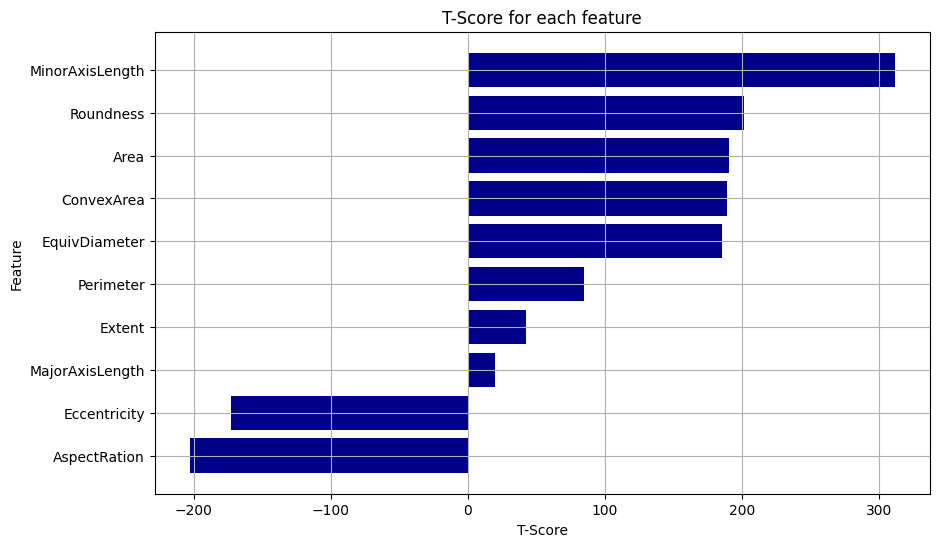

In [204]:
from scipy import stats

t_scores = {}
p_values = {}
for column in df_clean.columns:
    if column != 'Class':
        group0 = df[df['Class'] == 0][column]
        group1 = df[df['Class'] == 1][column]
        t_score, p_value = stats.ttest_ind(group0, group1)
        t_scores[column] = t_score
        p_values[column] = p_value

t_scores_df = pd.DataFrame(list(t_scores.items()), columns=['Feature', 'T-Score'])
p_values_df = pd.DataFrame(list(p_values.items()), columns=['Feature', 'p-value'])
df_tscore = pd.merge(t_scores_df, p_values_df, on='Feature')

df_tscore = df_tscore.sort_values('T-Score', ascending=False)
print(df_tscore)

sel_features = df_tscore['Feature'].tolist()
print(sel_features)

plt.figure(figsize=(10, 6))
plt.barh(df_tscore['Feature'], df_tscore['T-Score'], color='darkblue')
plt.xlabel('T-Score')
plt.ylabel('Feature')
plt.title('T-Score for each feature')
plt.grid(True)
plt.gca().invert_yaxis()
plt.show()

In [207]:
X = df_clean.drop('Class', axis=1)
y = df_clean['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(max_depth=6)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9914821124361158

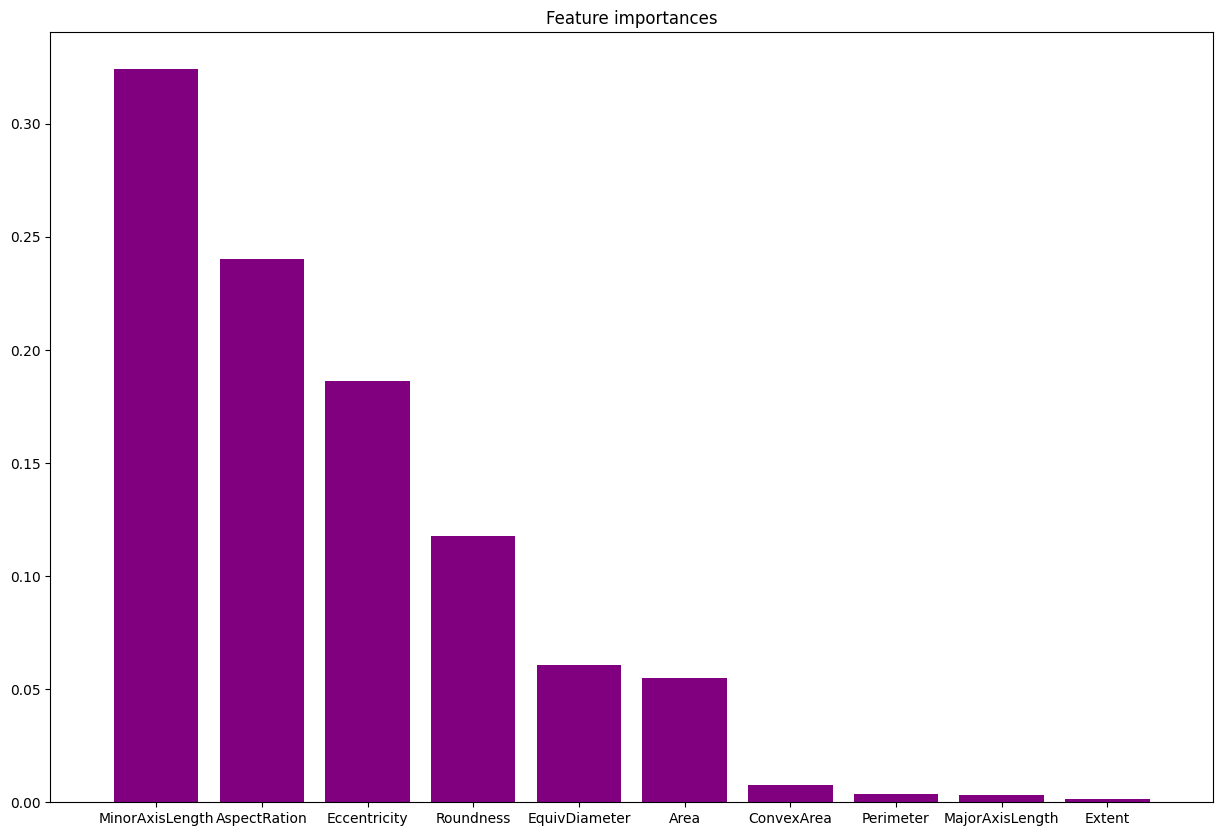

In [115]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(15, 10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="purple")
plt.xticks(range(X.shape[1]), X.columns[indices])
plt.xlim([-1, X.shape[1]])
plt.show()

In [224]:
var_sel = VarianceThreshold(threshold=(0.8 * (1 - 0.8)))
X_new = var_sel.fit_transform(X)
var_sel_features = X.columns[var_sel.get_support(indices=True)]
print('Selected features:', var_sel_features)
pd.DataFrame(data={'score':var_sel.variances_,'support':var_sel.get_support()}, index=X.columns).sort_values(by='score',ascending=False)

Selected features: Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea',
       'EquivDiameter', 'Perimeter', 'AspectRation'],
      dtype='object')


,score,support
ConvexArea,2.095278e+06,True
Area,1.999224e+06,True
Perimeter,6.648031e+02,True
MinorAxisLength,1.002554e+02,True
MajorAxisLength,9.887183e+01,True
EquivDiameter,8.876334e+01,True
AspectRation,1.804127e-01,True
Extent,1.091591e-02,False
Roundness,4.301524e-03,False
Eccentricity,7.412286e-04,False


In [127]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
model_var_sel = RandomForestClassifier(max_depth=6)
model_var_sel.fit(X_train, y_train)
model_var_sel.score(X_test, y_test)

0.9917660420215787

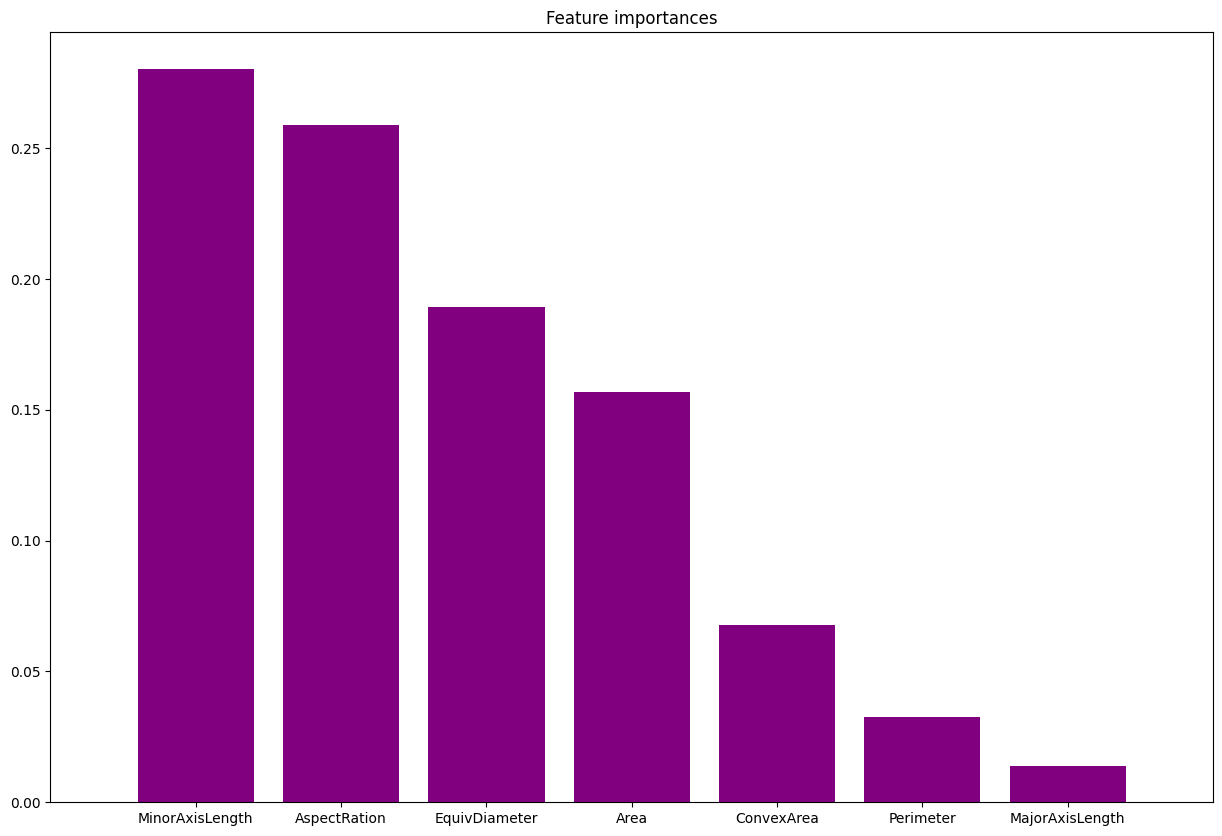

In [128]:
importances_var_sel = model_var_sel.feature_importances_
indices_var_sel = np.argsort(importances_var_sel)[::-1]
plt.figure(figsize=(15, 10))
plt.title("Feature importances")
plt.bar(range(X_new.shape[1]), importances_var_sel[indices_var_sel], color="purple")
plt.xticks(range(X_new.shape[1]), var_sel_features[indices_var_sel])
plt.xlim([-1, X_new.shape[1]])
plt.show()

In [209]:
kbest_sel = SelectKBest(score_func=f_classif, k=5)
X_new = kbest_sel.fit_transform(X, y)
kbest_sel_features = X.columns[kbest_sel.get_support(indices=True)]
print('Selected features:', kbest_sel_features)
pd.DataFrame(data={'score':kbest_sel.scores_,'support':kbest_sel.get_support()}, index=X.columns).sort_values(by='score',ascending=False)

Selected features: Index(['Area', 'MinorAxisLength', 'Eccentricity', 'Roundness', 'AspectRation'], dtype='object')


,score,support
MinorAxisLength,95872.814137,True
Eccentricity,78102.596713,True
Roundness,61620.260026,True
AspectRation,60974.172101,True
Area,39414.578654,True
EquivDiameter,38819.799177,False
ConvexArea,38625.810189,False
Perimeter,8259.841933,False
Extent,1912.541223,False
MajorAxisLength,262.867586,False


In [122]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
model_kbest_sel = RandomForestClassifier(max_depth=6)
model_kbest_sel.fit(X_train, y_train)
model_kbest_sel.score(X_test, y_test)

0.9914821124361158

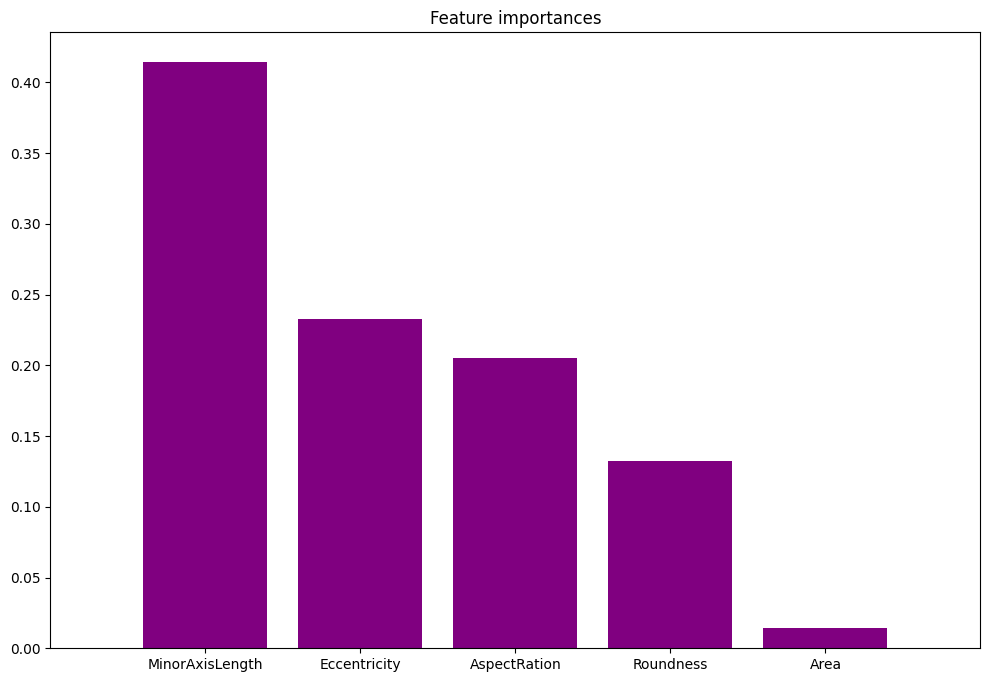

In [124]:
importances_kbest_sel = model_kbest_sel.feature_importances_
indices_kbest_sel = np.argsort(importances_kbest_sel)[::-1]
plt.figure(figsize=(12, 8))
plt.title("Feature importances")
plt.bar(range(X_new.shape[1]), importances_kbest_sel[indices_kbest_sel], color="purple")
plt.xticks(range(X_new.shape[1]), kbest_sel_features[indices_kbest_sel])
plt.xlim([-1, X_new.shape[1]])
plt.show()

In [347]:
gu_sel = GenericUnivariateSelect(score_func=f_classif, mode='k_best', param=5)
X_new = gu_sel.fit_transform(X, y)
gu_sel_features = X.columns[gu_sel.get_support(indices=True)]
print('Selected features:', gu_sel_features)
pd.DataFrame(data={'score':gu_sel.scores_,'support':gu_sel.get_support()}, index=X.columns).sort_values(by='score',ascending=False)

Selected features: Index(['Area', 'MinorAxisLength', 'Eccentricity', 'Roundness', 'AspectRation'], dtype='object')


,score,support
MinorAxisLength,95872.814137,True
Eccentricity,78102.596713,True
Roundness,61620.260026,True
AspectRation,60974.172101,True
Area,39414.578654,True
EquivDiameter,38819.799177,False
ConvexArea,38625.810189,False
Perimeter,8259.841933,False
Extent,1912.541223,False
MajorAxisLength,262.867586,False


In [348]:
print(*gu_sel_features)

Area MinorAxisLength Eccentricity Roundness AspectRation


In [349]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
model_gu_sel = RandomForestClassifier(max_depth=6)
model_gu_sel.fit(X_train, y_train)
model_gu_sel.score(X_test, y_test)

0.9914821124361158

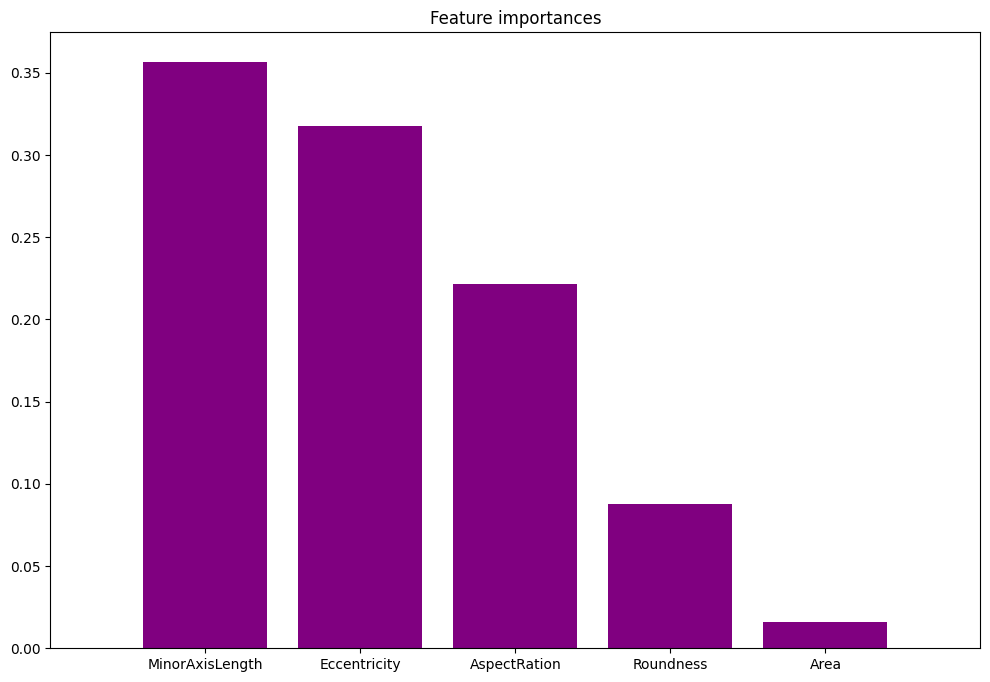

In [351]:
importances_gu_sel = model_gu_sel.feature_importances_
indices_gu_sel = np.argsort(importances_gu_sel)[::-1]
plt.figure(figsize=(12, 8))
plt.title("Feature importances")
plt.bar(range(X_new.shape[1]), importances_gu_sel[indices_gu_sel], color="purple")
plt.xticks(range(X_new.shape[1]), gu_sel_features[indices_gu_sel])
plt.xlim([-1, X_new.shape[1]])
plt.show()

In [306]:
X = df_clean.drop('Class', axis=1)
y = df_clean['Class']
standartscaler = StandardScaler()
X_norm = standartscaler.fit_transform(X)
estimator = LogisticRegression()
cv = StratifiedKFold(5)
model_sel_rfecv = RFECV(estimator, step=1, cv=cv, min_features_to_select=1)

model_sel_rfecv = model_sel_rfecv.fit(X_norm, y)
sel_rfecv_features = X.columns[model_sel_rfecv.support_]
print(f'{sel_rfecv_features}, number of features: {model_sel_rfecv.n_features_}')

Index(['Area', 'MajorAxisLength', 'ConvexArea', 'EquivDiameter', 'Roundness'], dtype='object'), number of features: 5


In [307]:
model_sel_rfecv.score(X_norm, y)

0.9902879536547964

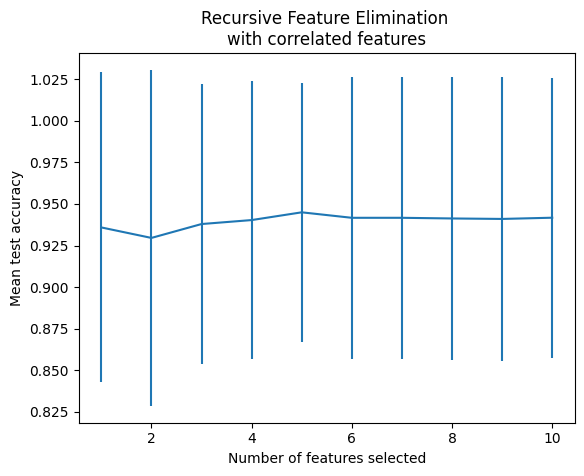

In [297]:
n_scores = len(model_sel_rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(1, n_scores + 1),
    model_sel_rfecv.cv_results_["mean_test_score"],
    yerr=model_sel_rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [145]:
result = permutation_importance(model_kbest_sel, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

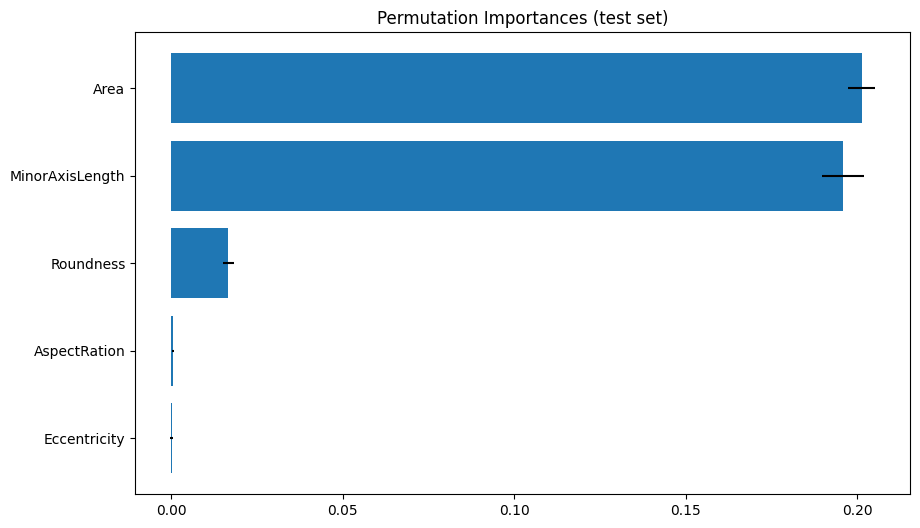

In [148]:
plt.figure(figsize=(10, 6))
plt.title("Permutation Importances (test set)")
plt.barh(range(X_new.shape[1]), result.importances_mean[sorted_idx], xerr=result.importances_std[sorted_idx], color="purple")
plt.yticks(range(X_new.shape[1]), selected_features[sorted_idx])
plt.show()

In [352]:
X = df_clean.drop('Class', axis=1)
y = df_clean['Class']
print(X.shape, y.shape)

(17607, 10) (17607,)


In [353]:
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=10).fit_transform(X)
X_embedded.shape

(17607, 2)

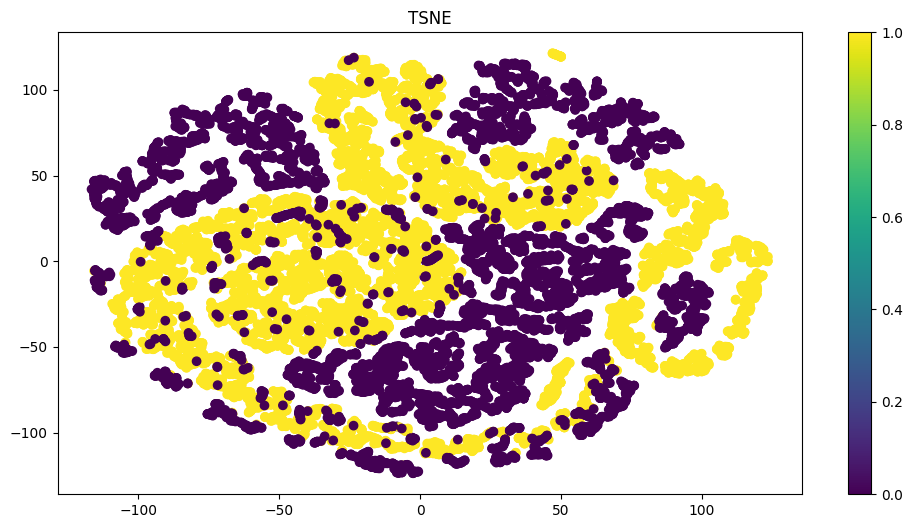

In [354]:
plt.figure(figsize=(12, 6))

plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y)
plt.title('TSNE')
plt.colorbar()
plt.show()